# Exploring the Seattle lifestyle through Airbnb lens

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA

This project is divided in 5 sections
1. Introduction
2. Exploring Data
        2.1 The Data
3. Exploratory Data Analysis(EDA)
        3.1 Describing Features
        3.2 Descriptive Figures
            3.2.1 Distribution Plots
            3.2.2 
        3.3 Feature Engineering
4. Model Selection
        4.1 Data Preparation: Train and Test set
        4.2 Model Selection: Logistic Regression
5. Actionable Recommendations

# 1. Introduction
While looking at dataset to explore on Seattle, I looked on [Kaggle](www.kaggle.com) and found [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data) Without any further thinking, I downloaded the dataset and started to explore it.

Before I started to explore the dataset,I had three questions in my mind to which I wanted to find answers.
1. What are the top 5 factors affecting which cause the rise in rent prices?
2. Which is the Peak Season and Off Season to visit Seattle in this year?
3. Who are the Top Hosts based on User Reviews and in which neighbourhoods are their properties located?

Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

In [2]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline 

In [3]:
# Importing csv files for initial review
# Loading the data
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [4]:
# Checking the shape of datasets

# calendar dataset contains Detailed Calendar Data for listings in Seattle
print("Shape of Calendar dataset:",df_calendar.shape);

# listings dataset contains Detailed Listings data for Seattle
print("Shape of Listings dataset:",df_listings.shape);

# reviews dataset contains Detailed Review Data for listings in Seattle
print("Shape of Reviews dataset:",df_reviews.shape);

Shape of Calendar dataset: (1393570, 4)
Shape of Listings dataset: (3818, 92)
Shape of Reviews dataset: (84849, 6)


In [5]:
# Review Listings dataset
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
df_listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [7]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
# checking columns which has null valus of listings dataframe
df_listings.columns[df_listings.isnull().any()].tolist()

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [9]:
# Updating Price from string to float to get distribution 
df_listings['price'] = df_listings['price'].str.replace(',', '')
df_listings['price'] = df_listings['price'].str.replace('$', '')
df_listings['price'] = df_listings['price'].astype(float)

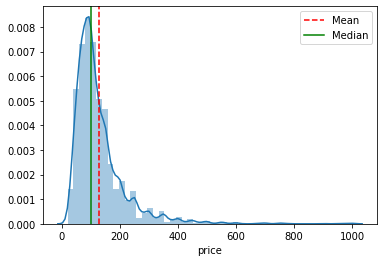

In [10]:
#Lets plot price distribution 
price_mean = df_listings['price'].mean();
price_median = df_listings['price'].median();

sns.distplot(df_listings['price']);
plt.axvline(price_mean, color='r', linestyle='--')
plt.axvline(price_median, color='g', linestyle='-')
plt.legend({'Mean':price_mean,'Median':price_median})
plt.show();

From above plot of price, it has right tailed distribution and price is more concentraded around $100. 

In [11]:
# Lets look at columns which prepresent 'price'
[col for col in df_listings.columns if 'price' in col]

['price', 'weekly_price', 'monthly_price']

In [12]:
#Lets convert price columns to numeric values
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace(',', '')
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace('$', '')
df_listings['weekly_price'] = df_listings['weekly_price'].astype(float)

In [13]:
df_listings['monthly_price'] = df_listings['monthly_price'].str.replace(',', '')
df_listings['monthly_price'] = df_listings['monthly_price'].str.replace('$', '')
df_listings['monthly_price'] = df_listings['monthly_price'].astype(float)

In [14]:
print('Number of ids in Listings dataset are %d'%(df_listings.id.nunique()));
print('Number of Host Ids in Listing Dataset are %d'%(df_listings.host_id.nunique()));
print('Average number of Listings per Host are %f'%((df_listings.id.nunique())/(df_listings.host_id.nunique())));
print('Maximum listings for Host id %d are %d'%(df_listings.host_id.value_counts().idxmax(),df_listings.host_id.value_counts().max()));

Number of ids in Listings dataset are 3818
Number of Host Ids in Listing Dataset are 2751
Average number of Listings per Host are 1.387859
Maximum listings for Host id 8534462 are 46


In [15]:
# Detailed information about Host who has maximum number of listings in dataset (Host ID 8534462)
df_listings[df_listings.host_id == df_listings.host_id.value_counts().idxmax()]

id                           listing_url       scrape_id  \
1077  3380159  https://www.airbnb.com/rooms/3380159  20160104002432   
1149  6913706  https://www.airbnb.com/rooms/6913706  20160104002432   
1152  9885225  https://www.airbnb.com/rooms/9885225  20160104002432   
1155  6990477  https://www.airbnb.com/rooms/6990477  20160104002432   
1159  7840228  https://www.airbnb.com/rooms/7840228  20160104002432   
1230  6766708  https://www.airbnb.com/rooms/6766708  20160104002432   
1237  5874421  https://www.airbnb.com/rooms/5874421  20160104002432   
1238  8829474  https://www.airbnb.com/rooms/8829474  20160104002432   
1278  4569115  https://www.airbnb.com/rooms/4569115  20160104002432   
1298  9497431  https://www.airbnb.com/rooms/9497431  20160104002432   
1312  8891577  https://www.airbnb.com/rooms/8891577  20160104002432   
1323  8815061  https://www.airbnb.com/rooms/8815061  20160104002432   
1340  8815638  https://www.airbnb.com/rooms/8815638  20160104002432   
1366  9886971  https://www.airbnb.com/rooms/9886971  20160104002432   
1376  8829472  https://www.airbnb.com/rooms/8829472  20160104002432   
1377  5183938  https://www.airbnb.com/rooms/5183938  20160104002432   
1400  2392869  https://www.airbnb.com/rooms/2392869  20160104002432   
1404  1601714  https://www.airbnb.com/rooms/1601714  20160104002432   
1424  9031119  https://www.airbnb.com/rooms/9031119  20160104002432   
1460  7506165  https://www.airbnb.com/rooms/7506165  20160104002432   
1466  3891695  https://www.airbnb.com/rooms/3891695  20160104002432   
1469  8805211  https://www.airbnb.com/rooms/8805211  20160104002432   
1478  7510776  https://www.airbnb.com/rooms/7510776  20160104002432   
1481  9183380  https://www.airbnb.com/rooms/9183380  20160104002432   
1482  9201292  https://www.airbnb.com/rooms/9201292  20160104002432   
1500  4009508  https://www.airbnb.com/rooms/4009508  20160104002432   
1519  3971934  https://www.airbnb.com/rooms/3971934  20160104002432   
1532  9024838  https://www.airbnb.com/rooms/9024838  20160104002432   
1537  1954452  https://www.airbnb.com/rooms/1954452  20160104002432   
1548  5213468  https://www.airbnb.com/rooms/5213468  20160104002432   
1557  3868138  https://www.airbnb.com/rooms/3868138  20160104002432   
1559  6807981  https://www.airbnb.com/rooms/6807981  20160104002432   
1575  5372156  https://www.airbnb.com/rooms/5372156  20160104002432   
1606  9318524  https://www.airbnb.com/rooms/9318524  20160104002432   
1613  3803947  https://www.airbnb.com/rooms/3803947  20160104002432   
1631  2825852  https://www.airbnb.com/rooms/2825852  20160104002432   
1637  9318440  https://www.airbnb.com/rooms/9318440  20160104002432   
1645  4410544  https://www.airbnb.com/rooms/4410544  20160104002432   
1652  9530877  https://www.airbnb.com/rooms/9530877  20160104002432   
1654  9530788  https://www.airbnb.com/rooms/9530788  20160104002432   
1657  4031625  https://www.airbnb.com/rooms/4031625  20160104002432   
1660  4106041  https://www.airbnb.com/rooms/4106041  20160104002432   
1667  6807884  https://www.airbnb.com/rooms/6807884  20160104002432   
1695  4008373  https://www.airbnb.com/rooms/4008373  20160104002432   
2748  2004931  https://www.airbnb.com/rooms/2004931  20160104002432   
2892  4009295  https://www.airbnb.com/rooms/4009295  20160104002432   

     last_scraped                                 name  \
1077   2016-01-04          Pike's Place. 100 Walkscore   
1149   2016-01-04     Westlake Ave Downtown Condos 1BD   
1152   2016-01-04   Westlake Ave Downtown Condos 1BD 4   
1155   2016-01-04   Westlake Ave Downtown Condos 1BD 2   
1159   2016-01-04   Westlake Ave Downtown Condos 1BD 3   
1230   2016-01-04            100 Walk Score - Lux 2Bed   
1237   2016-01-04       Great Location. 98 Walkscore 2   
1238   2016-01-04                Belltown Condos 1BD 4   
1278   2016-01-04   Downtown 2Bed Western Sunset Views   
1298   2016-01-04    Sky High Water View. 99 Walkscore   
1312   2016-01-04     Sky High Pent

In [16]:
#Lets plot number of listings by Neighbourhood
df_listings_neighbourhood_cnt = df_listings.groupby('neighbourhood_cleansed')['id'].count().reset_index(name="num_listings").sort_values(by='num_listings',ascending=False);

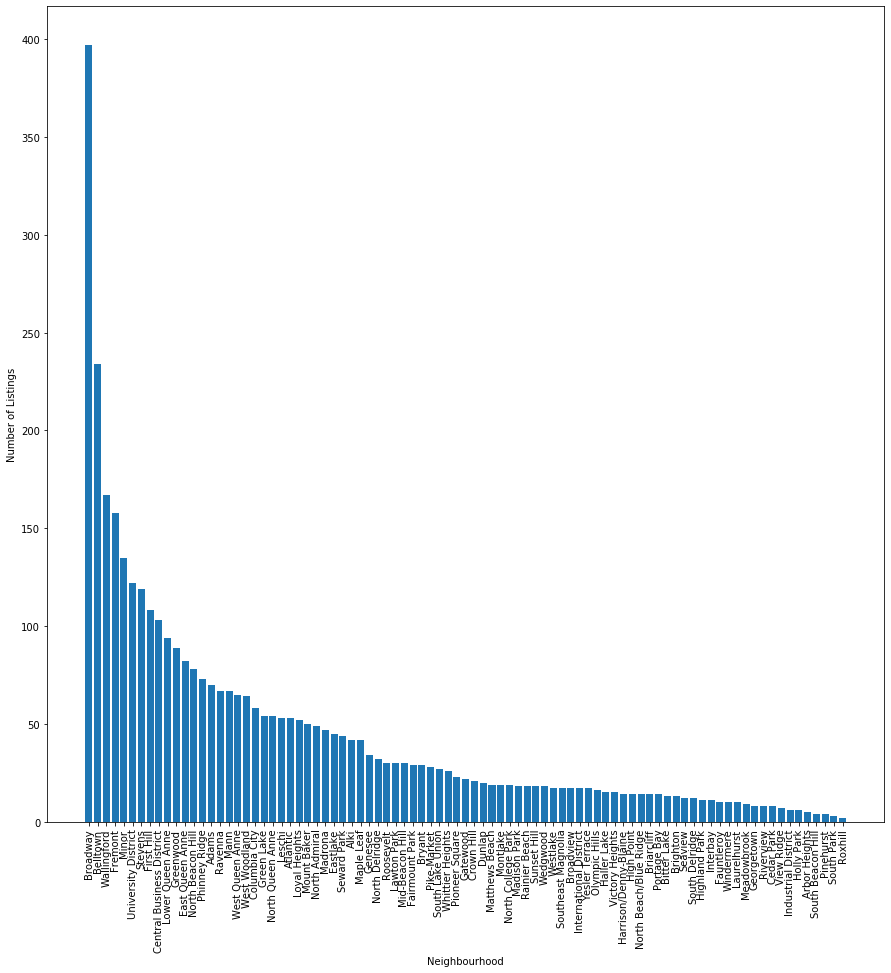

In [17]:
fig=plt.figure(figsize=(15,15))
plt.bar(df_listings_neighbourhood_cnt.neighbourhood_cleansed, df_listings_neighbourhood_cnt.num_listings);
plt.xticks(df_listings_neighbourhood_cnt.neighbourhood_cleansed, df_listings_neighbourhood_cnt.neighbourhood_cleansed,rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')   
plt.show();

In [18]:
#Lets plot average price by Neighbourhood
df_listings_neighbourhood_price = df_listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index(name="Avg_Price").sort_values(by='Avg_Price',ascending=False);

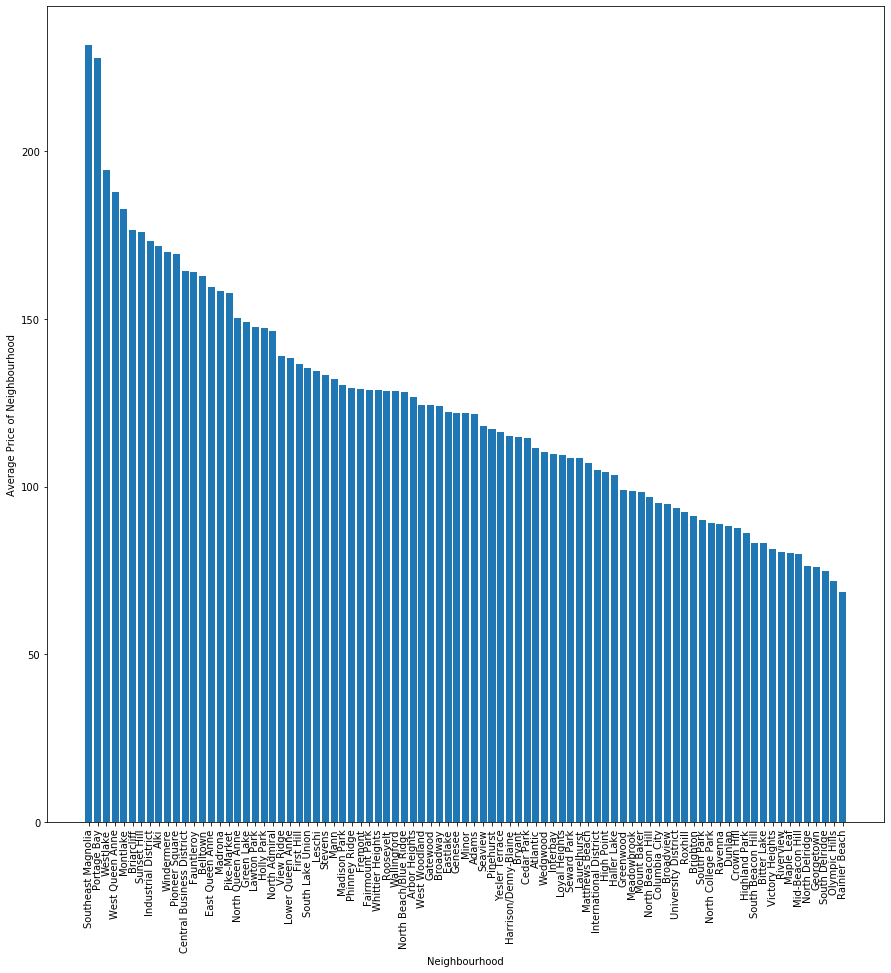

In [19]:
fig=plt.figure(figsize=(15,15))
plt.bar(df_listings_neighbourhood_price.neighbourhood_cleansed, df_listings_neighbourhood_price.Avg_Price);
plt.xticks(df_listings_neighbourhood_price.neighbourhood_cleansed, df_listings_neighbourhood_price.neighbourhood_cleansed,rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price of Neighbourhood')   
plt.show();

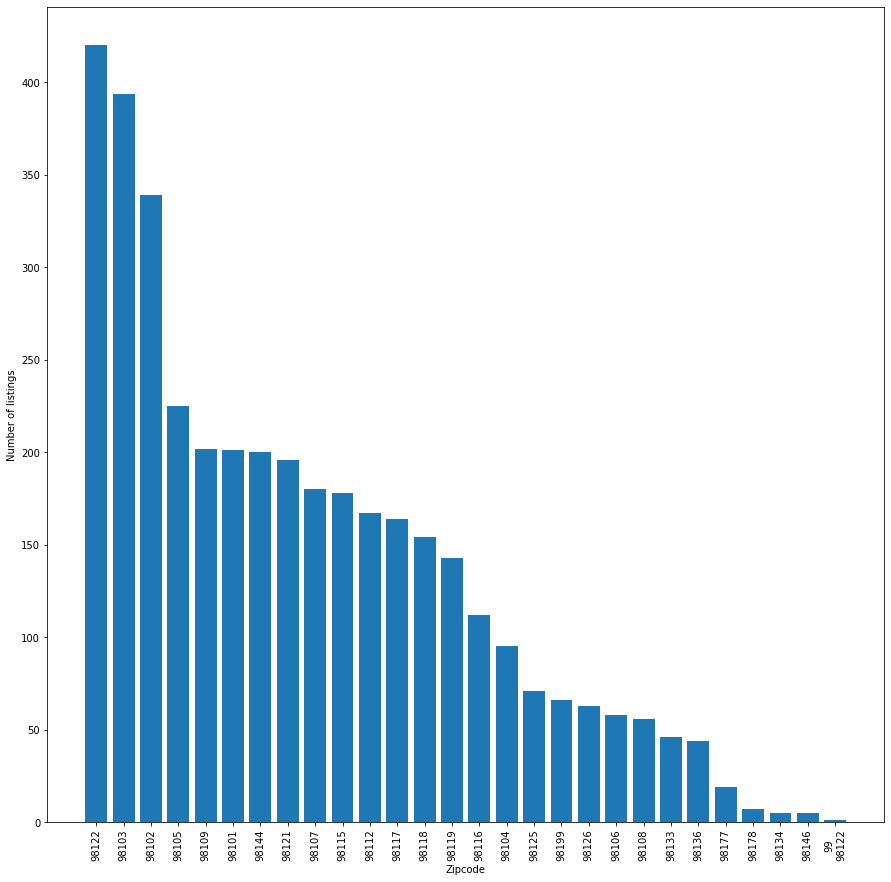

In [20]:
# Lets look at price by zipcode
df_listings_zipcode_cnt=df_listings.groupby('zipcode')['id'].count().reset_index(name="num_listings_by_zipcode").sort_values(by='num_listings_by_zipcode',ascending=False)
fig=plt.figure(figsize=(15,15))
plt.bar(df_listings_zipcode_cnt.zipcode, df_listings_zipcode_cnt.num_listings_by_zipcode);
plt.xticks(df_listings_zipcode_cnt.zipcode, df_listings_zipcode_cnt.zipcode,rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Number of listings')   
plt.show();

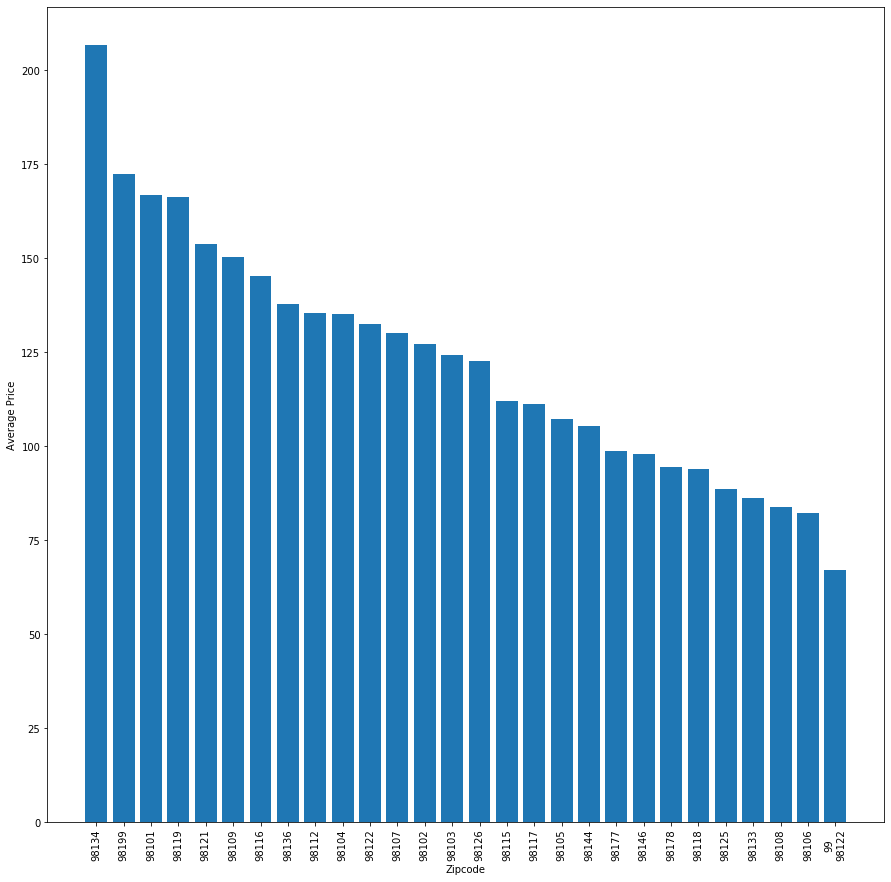

In [21]:
#Lets look at Average price by Zipcode
df_listings_zipcode_price=df_listings.groupby('zipcode')['price'].mean().reset_index(name="Avg_Price_by_zipcode").sort_values(by='Avg_Price_by_zipcode',ascending=False)
fig=plt.figure(figsize=(15,15))
plt.bar(df_listings_zipcode_price.zipcode, df_listings_zipcode_price.Avg_Price_by_zipcode);
plt.xticks(df_listings_zipcode_price.zipcode, df_listings_zipcode_price.zipcode,rotation=90)
plt.xlabel('Zipcode')
plt.ylabel('Average Price')   
plt.show();

In [156]:
df_listings.host_id.nunique()

2751

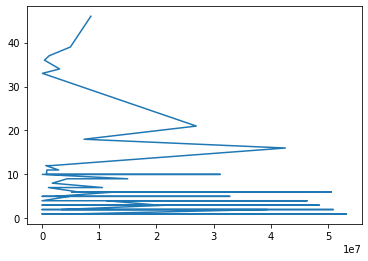

In [159]:
plt.plot(df_listings.host_id.value_counts());
plt.show();

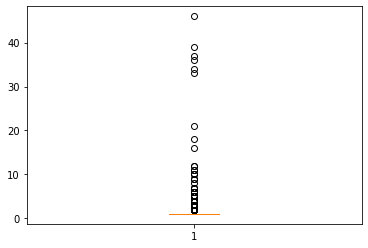

In [179]:
plt.boxplot(df_listings.host_id.value_counts());
plt.show();

In [181]:
df_listings.host_id.value_counts().sum()

3818

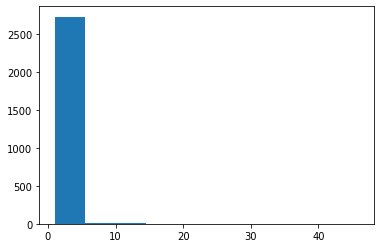

In [169]:
host_prop_cnt = df_listings.groupby(['host_id'])['id'].count();
plt.hist(host_prop_cnt);
plt.show();

In [171]:
host_prop_cnt.shape

(2751,)

In [158]:
df_listings.host_id.value_counts()

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
            ..
38090170     1
11839982     1
668141       1
1691632      1
10420224     1
Name: host_id, Length: 2751, dtype: int64

In [130]:
price_bins = df_listings.price.value_counts().to_frame()

In [138]:
list(price_bins.index)

['$150.00',
 '$100.00',
 '$75.00',
 '$99.00',
 '$95.00',
 '$90.00',
 '$125.00',
 '$85.00',
 '$65.00',
 '$80.00',
 '$110.00',
 '$70.00',
 '$55.00',
 '$120.00',
 '$200.00',
 '$175.00',
 '$60.00',
 '$50.00',
 '$115.00',
 '$250.00',
 '$69.00',
 '$40.00',
 '$105.00',
 '$79.00',
 '$129.00',
 '$135.00',
 '$89.00',
 '$130.00',
 '$45.00',
 '$49.00',
 '$59.00',
 '$225.00',
 '$139.00',
 '$109.00',
 '$149.00',
 '$350.00',
 '$140.00',
 '$300.00',
 '$145.00',
 '$195.00',
 '$119.00',
 '$165.00',
 '$160.00',
 '$35.00',
 '$39.00',
 '$68.00',
 '$275.00',
 '$199.00',
 '$180.00',
 '$155.00',
 '$42.00',
 '$98.00',
 '$97.00',
 '$78.00',
 '$170.00',
 '$88.00',
 '$58.00',
 '$400.00',
 '$82.00',
 '$325.00',
 '$169.00',
 '$185.00',
 '$220.00',
 '$93.00',
 '$245.00',
 '$30.00',
 '$72.00',
 '$190.00',
 '$295.00',
 '$38.00',
 '$126.00',
 '$67.00',
 '$215.00',
 '$62.00',
 '$52.00',
 '$375.00',
 '$87.00',
 '$74.00',
 '$53.00',
 '$450.00',
 '$159.00',
 '$47.00',
 '$92.00',
 '$183.00',
 '$189.00',
 '$138.00',
 '$122.0

In [22]:
df_listings['calendar_last_scraped'].value_counts()

2016-01-04    3818
Name: calendar_last_scraped, dtype: int64

In [23]:
print(("Rows %s and Columns %s")%(df_listings.shape[0], df_listings.shape[1]))

Rows 3818 and Columns 92


In [24]:
df_listings.host_id.value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [25]:
df_listings[df_listings.host_id==8534462].head()

id                           listing_url       scrape_id  \
1077  3380159  https://www.airbnb.com/rooms/3380159  20160104002432   
1149  6913706  https://www.airbnb.com/rooms/6913706  20160104002432   
1152  9885225  https://www.airbnb.com/rooms/9885225  20160104002432   
1155  6990477  https://www.airbnb.com/rooms/6990477  20160104002432   
1159  7840228  https://www.airbnb.com/rooms/7840228  20160104002432   

     last_scraped                                name  \
1077   2016-01-04         Pike's Place. 100 Walkscore   
1149   2016-01-04    Westlake Ave Downtown Condos 1BD   
1152   2016-01-04  Westlake Ave Downtown Condos 1BD 4   
1155   2016-01-04  Westlake Ave Downtown Condos 1BD 2   
1159   2016-01-04  Westlake Ave Downtown Condos 1BD 3   

                                                summary  \
1077  With a 100% Walk-Score, this spacious 1BD apar...   
1149  98 Walkscore unit on a high floor right downto...   
1152  98 Walkscore Penthouse unit on the top floor, ...   
1155  98 Walkscore unit on a high floor right downto...   
1159  98 Walkscore Penthouse unit on the top floor, ...   

                                                  space  \
1077  With a 100% Walk-Score, this spacious 1BD apar...   
1149  *About the Neighborhood* The neighborhood is r...   
1152                                                NaN   
1155  Other units in the same building:  https://www...   
1159  *About the Neighborhood* The neighborhood is r...   

                                            description experiences_offered  \
1077  With a 100% Walk-Score, this spacious 1BD apar...                none   
1149  98 Walkscore unit on a high floor right downto...                none   
1152  98 Walkscore Penthouse unit on the top floor, ...                none   
1155  98 Walkscore unit on a high floor right downto...                none   
1159  98 Walkscore Penthouse unit on the top floor, ...                none   

     neighborhood_overview  ... review_scores_value requires_license license  \
1077                   NaN  ...                 9.0                f     NaN   
1149                   NaN  ...                 9.0                f     NaN   
1152                   NaN  ...                 NaN                f     NaN   
1155                   NaN  ...                10.0                f     NaN   
1159                   NaN  ...                 9.0                f     NaN   

     jurisdiction_names instant_bookable cancellation_policy  \
1077         WASHINGTON                f              strict   
1149         WASHINGTON                f              strict   
1152         WASHINGTON                f              strict   
1155         WASHINGTON                f              strict   
1159         WASHINGTON                f              strict   

      require_guest_profile_picture require_guest_phone_verification  \
1077                              t                                t   
1149                              t                                t   
1152                              t                                t   
1155                              t                                t   
1159                              t                                t   

     calculated_host_listings_count reviews_per_month  
1077                              3              2.71  
1149                              3              3.11  
1152                              3               NaN  
1155                              3              4.24  
1159                              3              1.27  

[5 rows x 92 columns]

In [26]:
df_listings[df_listings.host_id==4962900].head()

id                           listing_url       scrape_id  \
1065   936484   https://www.airbnb.com/rooms/936484  20160104002432   
1067   938785   https://www.airbnb.com/rooms/938785  20160104002432   
1068   934216   https://www.airbnb.com/rooms/934216  20160104002432   
1209  4410493  https://www.airbnb.com/rooms/4410493  20160104002432   
1265  5446176  https://www.airbnb.com/rooms/5446176  20160104002432   

     last_scraped                                 name  \
1065   2016-01-04   Marketside Flats next to Pike! MS1   
1067   2016-01-04  Best Ocean Views By Pike Place! PA1   
1068   2016-01-04   Amazing Waterview! PIKE PLACE! HSW   
1209   2016-01-04       Heart of Downtown Seattle! SH2   
1265   2016-01-04  Amazing Location, Great Dining! V62   

                                                summary  \
1065  The Marketside Flats is a fantastic home base ...   
1067  Post Alley Court offers amazing views of Ellio...   
1068  One block from Pike Place Market, the best of ...   
1209  The Shelby is centrally located at the interse...   
1265  Via6 is downtown Seattle's hottest new vertica...   

                                                  space  \
1065  LOCATED RIGHT NEXT TO PIKE PLACE MARKET!!! You...   
1067  Water views from balcony, only 1/2 block to Pi...   
1068  UNIT HAS BEEN RENOVATED! UPDATED PICS COMING S...   
1209  Life at the Shelby is about enjoying everythin...   
1265  Via6 in Seattle is a brand new property for us...   

                                            description experiences_offered  \
1065  The Marketside Flats is a fantastic home base ...                none   
1067  Post Alley Court offers amazing views of Ellio...                none   
1068  One block from Pike Place Market, the best of ...                none   
1209  The Shelby is centrally located at the interse...                none   
1265  Via6 is downtown Seattle's hottest new vertica...                none   

                                  neighborhood_overview  ...  \
1065  In the heart of Downtown Seattle! Nearby Attra...  ...   
1067  In the heart of Downtown Seattle! Nearby Attra...  ...   
1068  In the heart of Downtown Seattle! Nearby Attra...  ...   
1209  In the heart of Downtown Seattle! Nearby Attra...  ...   
1265  In the heart of Downtown Seattle! Nearby Attra...  ...   

     review_scores_value requires_license license jurisdiction_names  \
1065                 9.0                f     NaN         WASHINGTON   
1067                 9.0                f     NaN         WASHINGTON   
1068                 9.0                f     NaN         WASHINGTON   
1209                 9.0                f     NaN         WASHINGTON   
1265                10.0                f     NaN         WASHINGTON   

     instant_bookable cancellation_policy  require_guest_profile_picture  \
1065                f              strict                              f   
1067                f              strict                              f   
1068                f              strict                              f   
1209                f              strict                              f   
1265                f              strict                              f   

     require_guest_phone_verification calculated_host_listings_count  \
1065                                f                              1   
1067                                f                              1   
1068                                f                              1   
1209                                f                              1   
1265                                f                              1   

     reviews_per_month  
1065              0.46  
1067              0.63  
1068              0.68  
1209              0.81  
1265              1.40  

[5 rows x 92 columns]

In [27]:
df_listings[df_listings.price==np.max(df_listings.price)].head()

id                           listing_url       scrape_id  \
3122  4825073  https://www.airbnb.com/rooms/4825073  20160104002432   

     last_scraped                     name  \
3122   2016-01-04  Cute Basement Apartment   

                                                summary space  \
3122  2 bedroom fully finished basement apartment wi...   NaN   

                                            description experiences_offered  \
3122  2 bedroom fully finished basement apartment wi...                none   

     neighborhood_overview  ... review_scores_value requires_license license  \
3122                   NaN  ...                10.0                f     NaN   

     jurisdiction_names instant_bookable cancellation_policy  \
3122         WASHINGTON                f            flexible   

      require_guest_profile_picture require_guest_phone_verification  \
3122                              f                                f   

     calculated_host_listings_count reviews_per_month  
3122                              1              0.08  

[1 rows x 92 columns]

In [28]:
df_listings.price.value_counts().nlargest()

150.0    162
100.0    159
75.0     118
95.0     110
99.0     110
Name: price, dtype: int64

In [51]:
list(df_listings.price.unique())

['$85.00',
 '$150.00',
 '$975.00',
 '$100.00',
 '$450.00',
 '$120.00',
 '$80.00',
 '$60.00',
 '$90.00',
 '$95.00',
 '$99.00',
 '$245.00',
 '$165.00',
 '$461.00',
 '$109.00',
 '$66.00',
 '$200.00',
 '$700.00',
 '$110.00',
 '$75.00',
 '$600.00',
 '$45.00',
 '$300.00',
 '$175.00',
 '$325.00',
 '$222.00',
 '$159.00',
 '$125.00',
 '$348.00',
 '$148.00',
 '$350.00',
 '$349.00',
 '$160.00',
 '$130.00',
 '$137.00',
 '$20.00',
 '$145.00',
 '$400.00',
 '$70.00',
 '$170.00',
 '$465.00',
 '$50.00',
 '$59.00',
 '$47.00',
 '$55.00',
 '$65.00',
 '$25.00',
 '$40.00',
 '$149.00',
 '$129.00',
 '$105.00',
 '$218.00',
 '$126.00',
 '$115.00',
 '$225.00',
 '$89.00',
 '$134.00',
 '$375.00',
 '$97.00',
 '$197.00',
 '$135.00',
 '$180.00',
 '$69.00',
 '$195.00',
 '$224.00',
 '$338.00',
 '$79.00',
 '$49.00',
 '$57.00',
 '$96.00',
 '$295.00',
 '$53.00',
 '$35.00',
 '$133.00',
 '$61.00',
 '$52.00',
 '$275.00',
 '$199.00',
 '$435.00',
 '$250.00',
 '$116.00',
 '$39.00',
 '$98.00',
 '$73.00',
 '$190.00',
 '$68.00',
 

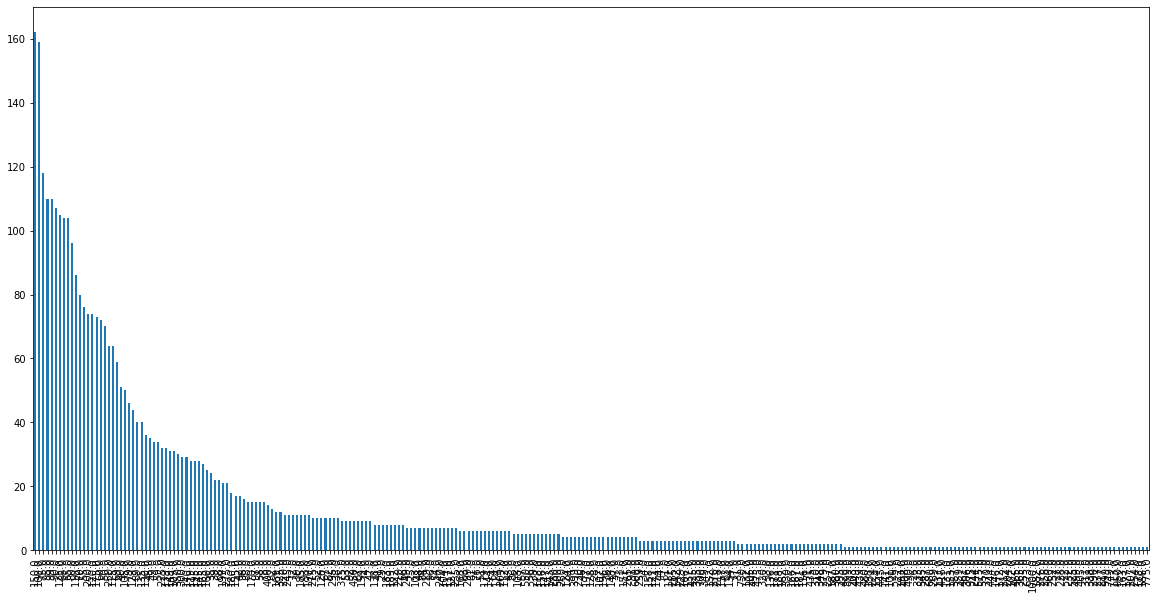

In [29]:
# plt.hist(df_listings[df_listings.price == np.max(df_listings.price)], bins=5);
fig, ax = plt.subplots(figsize=(20, 10))
df_listings['price'].value_counts().plot(kind='bar');

In [30]:
df_listings['review_scores_value'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_value, dtype: float64

In [31]:
df_listings.city.value_counts().nlargest()

Seattle             3810
West Seattle           2
Seattle                2
Ballard, Seattle       1
seattle                1
Name: city, dtype: int64

In [32]:
df_listings.describe().transpose()

count          mean           std  \
id                              3818.0  5.550111e+06  2.962660e+06   
scrape_id                       3818.0  2.016010e+13  0.000000e+00   
host_id                         3818.0  1.578556e+07  1.458382e+07   
host_listings_count             3816.0  7.157757e+00  2.862815e+01   
host_total_listings_count       3816.0  7.157757e+00  2.862815e+01   
latitude                        3818.0  4.762896e+01  4.305195e-02   
longitude                       3818.0 -1.223331e+02  3.174451e-02   
accommodates                    3818.0  3.349398e+00  1.977599e+00   
bathrooms                       3802.0  1.259469e+00  5.903691e-01   
bedrooms                        3812.0  1.307712e+00  8.833949e-01   
beds                            3817.0  1.735394e+00  1.139480e+00   
square_feet                       97.0  8.546186e+02  6.714049e+02   
price                           3818.0  1.279762e+02  9.025002e+01   
weekly_price                    2009.0  7.884818e+02  5.323523e+02   
monthly_price                   1517.0  2.613336e+03  1.722268e+03   
guests_included                 3818.0  1.672603e+00  1.311040e+00   
minimum_nights                  3818.0  2.369303e+00  1.630590e+01   
maximum_nights                  3818.0  7.804476e+02  1.683589e+03   
availability_30                 3818.0  1.678628e+01  1.217364e+01   
availability_60                 3818.0  3.681482e+01  2.333754e+01   
availability_90                 3818.0  5.808250e+01  3.406385e+01   
availability_365                3818.0  2.447727e+02  1.267725e+02   
number_of_reviews               3818.0  2.222342e+01  3.773089e+01   
review_scores_rating            3171.0  9.453926e+01  6.606083e+00   
review_scores_accuracy          3160.0  9.636392e+00  6.980312e-01   
review_scores_cleanliness       3165.0  9.556398e+00  7.972739e-01   
review_scores_checkin           3160.0  9.786709e+00  5.954990e-01   
review_scores_communication     3167.0  9.809599e+00  5.682114e-01   
review_scores_location          3163.0  9.608916e+00  6.290532e-01   
review_scores_value             3162.0  9.452245e+00  7.502586e-01   
license                            0.0           NaN           NaN   
calculated_host_listings_count  3818.0  2.946307e+00  5.893029e+00   
reviews_per_month               3191.0  2.078919e+00  1.822348e+00   

                                         min           25%           50%  \
id                              3.335000e+03  3.258256e+06  6.118244e+06   
scrape_id                       2.016010e+13  2.016010e+13  2.016010e+13   
host_id                         4.193000e+03  3.275204e+06  1.055814e+07   
host_listings_count             1.000000e+00  1.000000e+00  1.000000e+00   
host_total_listings_count       1.000000e+00  1.000000e+00  1.000000e+00   
latitude                        4.750509e+01  4.760942e+01  4.762360e+01   
longitude                      -1.224172e+02 -1.223543e+02 -1.223289e+02   
accommodates                    1.000000e+00  2.000000e+00  3.000000e+00   
bathrooms                       0.000000e+00  1.000000e+00  1.000000e+00   
bedrooms                        0.000000e+00  1.000000e+00  1.000000e+00   
beds                            1.000000e+00  1.000000e+00  1.000000e+00   
square_feet                     0.000000e+00  4.200000e+02  7.500000e+02   
price                           2.000000e+01  7.500000e+01  1.000000e+02   
weekly_price                    1.000000e+02  4.550000e+02  6.500000e+02   
monthly_price                   5.000000e+02  1.512000e+03  2.200000e+03   
guests_included                 0.000000e+00  1.000000e+00  1.000000e+00   
minimum_nights                  1.000000e+00  1.000000e+00  2.000000e+00   
maximum_nights                  1.000000e+00  6.000000e+01  1.125000e+03   
availability_30                 0.000000e+00  2.000000e+00  2.000000e+01   
availability_60                 0.000000e+00  1.300000e+01  4.600000e+01   
availability_90                 0.000000e+00  2.800000e+

In [33]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [12]:
df.shape[0]/df.date.nunique()

3818.0

In [14]:
df.price.isnull().mean()

0.32938998399793334

In [17]:
df.listing_id.nunique()

3818

In [20]:
df_listings.shape

(3818, 92)

In [21]:
df_calendar.shape

(1393570, 4)

In [22]:
df_reviews.shape

(84849, 6)

In [35]:
df_listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [36]:
list(df_listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [37]:
df_listings.loc[:,('id', 'host_name')].head()

id host_name
0   241032     Maija
1   953595    Andrea
2  3308979      Jill
3  7421966     Emily
4   278830     Emily

In [28]:
df_listings.shape

(3818, 92)

In [38]:
df_listings.groupby(['host_id']).count()['id'].nlargest()

host_id
8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: id, dtype: int64

In [41]:
df_listings.shape[0]

3818

In [66]:
df_listings.loc[df_listings.host_id == 8534462, (['id', 'host_id', 'host_name', 'host_location', 'description'])]

id  host_id host_name                       host_location  \
1077  3380159  8534462   Daniela  Seattle, Washington, United States   
1149  6913706  8534462   Daniela  Seattle, Washington, United States   
1152  9885225  8534462   Daniela  Seattle, Washington, United States   
1155  6990477  8534462   Daniela  Seattle, Washington, United States   
1159  7840228  8534462   Daniela  Seattle, Washington, United States   
1230  6766708  8534462   Daniela  Seattle, Washington, United States   
1237  5874421  8534462   Daniela  Seattle, Washington, United States   
1238  8829474  8534462   Daniela  Seattle, Washington, United States   
1278  4569115  8534462   Daniela  Seattle, Washington, United States   
1298  9497431  8534462   Daniela  Seattle, Washington, United States   
1312  8891577  8534462   Daniela  Seattle, Washington, United States   
1323  8815061  8534462   Daniela  Seattle, Washington, United States   
1340  8815638  8534462   Daniela  Seattle, Washington, United States   
1366  9886971  8534462   Daniela  Seattle, Washington, United States   
1376  8829472  8534462   Daniela  Seattle, Washington, United States   
1377  5183938  8534462   Daniela  Seattle, Washington, United States   
1400  2392869  8534462   Daniela  Seattle, Washington, United States   
1404  1601714  8534462   Daniela  Seattle, Washington, United States   
1424  9031119  8534462   Daniela  Seattle, Washington, United States   
1460  7506165  8534462   Daniela  Seattle, Washington, United States   
1466  3891695  8534462   Daniela  Seattle, Washington, United States   
1469  8805211  8534462   Daniela  Seattle, Washington, United States   
1478  7510776  8534462   Daniela  Seattle, Washington, United States   
1481  9183380  8534462   Daniela  Seattle, Washington, United States   
1482  9201292  8534462   Daniela  Seattle, Washington, United States   
1500  4009508  8534462   Daniela  Seattle, Washington, United States   
1519  3971934  8534462   Daniela  Seattle, Washington, United States   
1532  9024838  8534462   Daniela  Seattle, Washington, United States   
1537  1954452  8534462   Daniela  Seattle, Washington, United States   
1548  5213468  8534462   Daniela  Seattle, Washington, United States   
1557  3868138  8534462   Daniela  Seattle, Washington, United States   
1559  6807981  8534462   Daniela  Seattle, Washington, United States   
1575  5372156  8534462   Daniela  Seattle, Washington, United States   
1606  9318524  8534462   Daniela  Seattle, Washington, United States   
1613  3803947  8534462   Daniela  Seattle, Washington, United States   
1631  2825852  8534462   Daniela  Seattle, Washington, United States   
1637  9318440  8534462   Daniela  Seattle, Washington, United States   
1645  4410544  8534462   Daniela  Seattle, Washington, United States   
1652  9530877  8534462   Daniela  Seattle, Washington, United States   
1654  9530788  8534462   Daniela  Seattle, Washington, United States   
1657  4031625  8534462   Daniela  Seattle, Washington, United States   
1660  4106041  8534462   Daniela  Seattle, Washington, United States   
1667  6807884  8534462   Daniela  Seattle, Washington, United States   
1695  4008373  8534462   Daniela  Seattle, Washington, United States   
2748  2004931  8534462   Daniela  Seattle, Washington, United States   
2892  4009295  8534462   Daniela  Seattle, Washington, United States   

                                            description  
1077  With a 100% Walk-Score, this spacious 1BD apar...  
1149  98 Walkscore unit on a high floor right downto...  
1152  98 Walkscore Penthouse unit on the top floor, ...  
1155  98 Walkscore unit on a high floor right downto...  
1159  98 Walkscore Penthouse unit on the top floor, ...  
1230  With an unbeatable 100 Walkscore, this luxurio...  
1237  Right at the heart of Seattle's fastest-growin...  
1238  *Clear View of New Year's Eve Space Needle Fir...  
1278  Comfortable 2Bed in Belltown. Close to the Spa...  
1298  Best place to ring in the new year with 

In [47]:
df_listings['host_id'].head()

0      956883
1     5177328
2    16708587
3     9851441
4     1452570
Name: host_id, dtype: int64

In [39]:
df_listings['host_location'].value_counts().head(10)

Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
Bellevue, Washington, United States           12
San Francisco, California, United States      11
Mercer Island, Washington, United States      10
Kirkland, Washington, United States            8
New York, New York, United States              6
Name: host_location, dtype: int64

In [40]:
df_listings.loc[1077,:]

id                                                               3380159
listing_url                         https://www.airbnb.com/rooms/3380159
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                         Pike's Place. 100 Walkscore
                                                    ...                 
cancellation_policy                                               strict
require_guest_profile_picture                                          t
require_guest_phone_verification                                       t
calculated_host_listings_count                                         3
reviews_per_month                                                   2.71
Name: 1077, Length: 92, dtype: object

In [41]:
df_listings['host_id'].value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [42]:
df_listings[df_listings.id == 7421966]

id                           listing_url       scrape_id last_scraped  \
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   

                 name                                            summary  \
3  Queen Anne Chateau  A charming apartment that sits atop Queen Anne...   

  space                                        description  \
3   NaN  A charming apartment that sits atop Queen Anne...   

  experiences_offered neighborhood_overview  ... review_scores_value  \
3                none                   NaN  ...                 NaN   

  requires_license license jurisdiction_names instant_bookable  \
3                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
3            flexible                              f   

  require_guest_phone_verification calculated_host_listings_count  \
3                                f                              1   

  reviews_per_month  
3               NaN  

[1 rows x 92 columns]

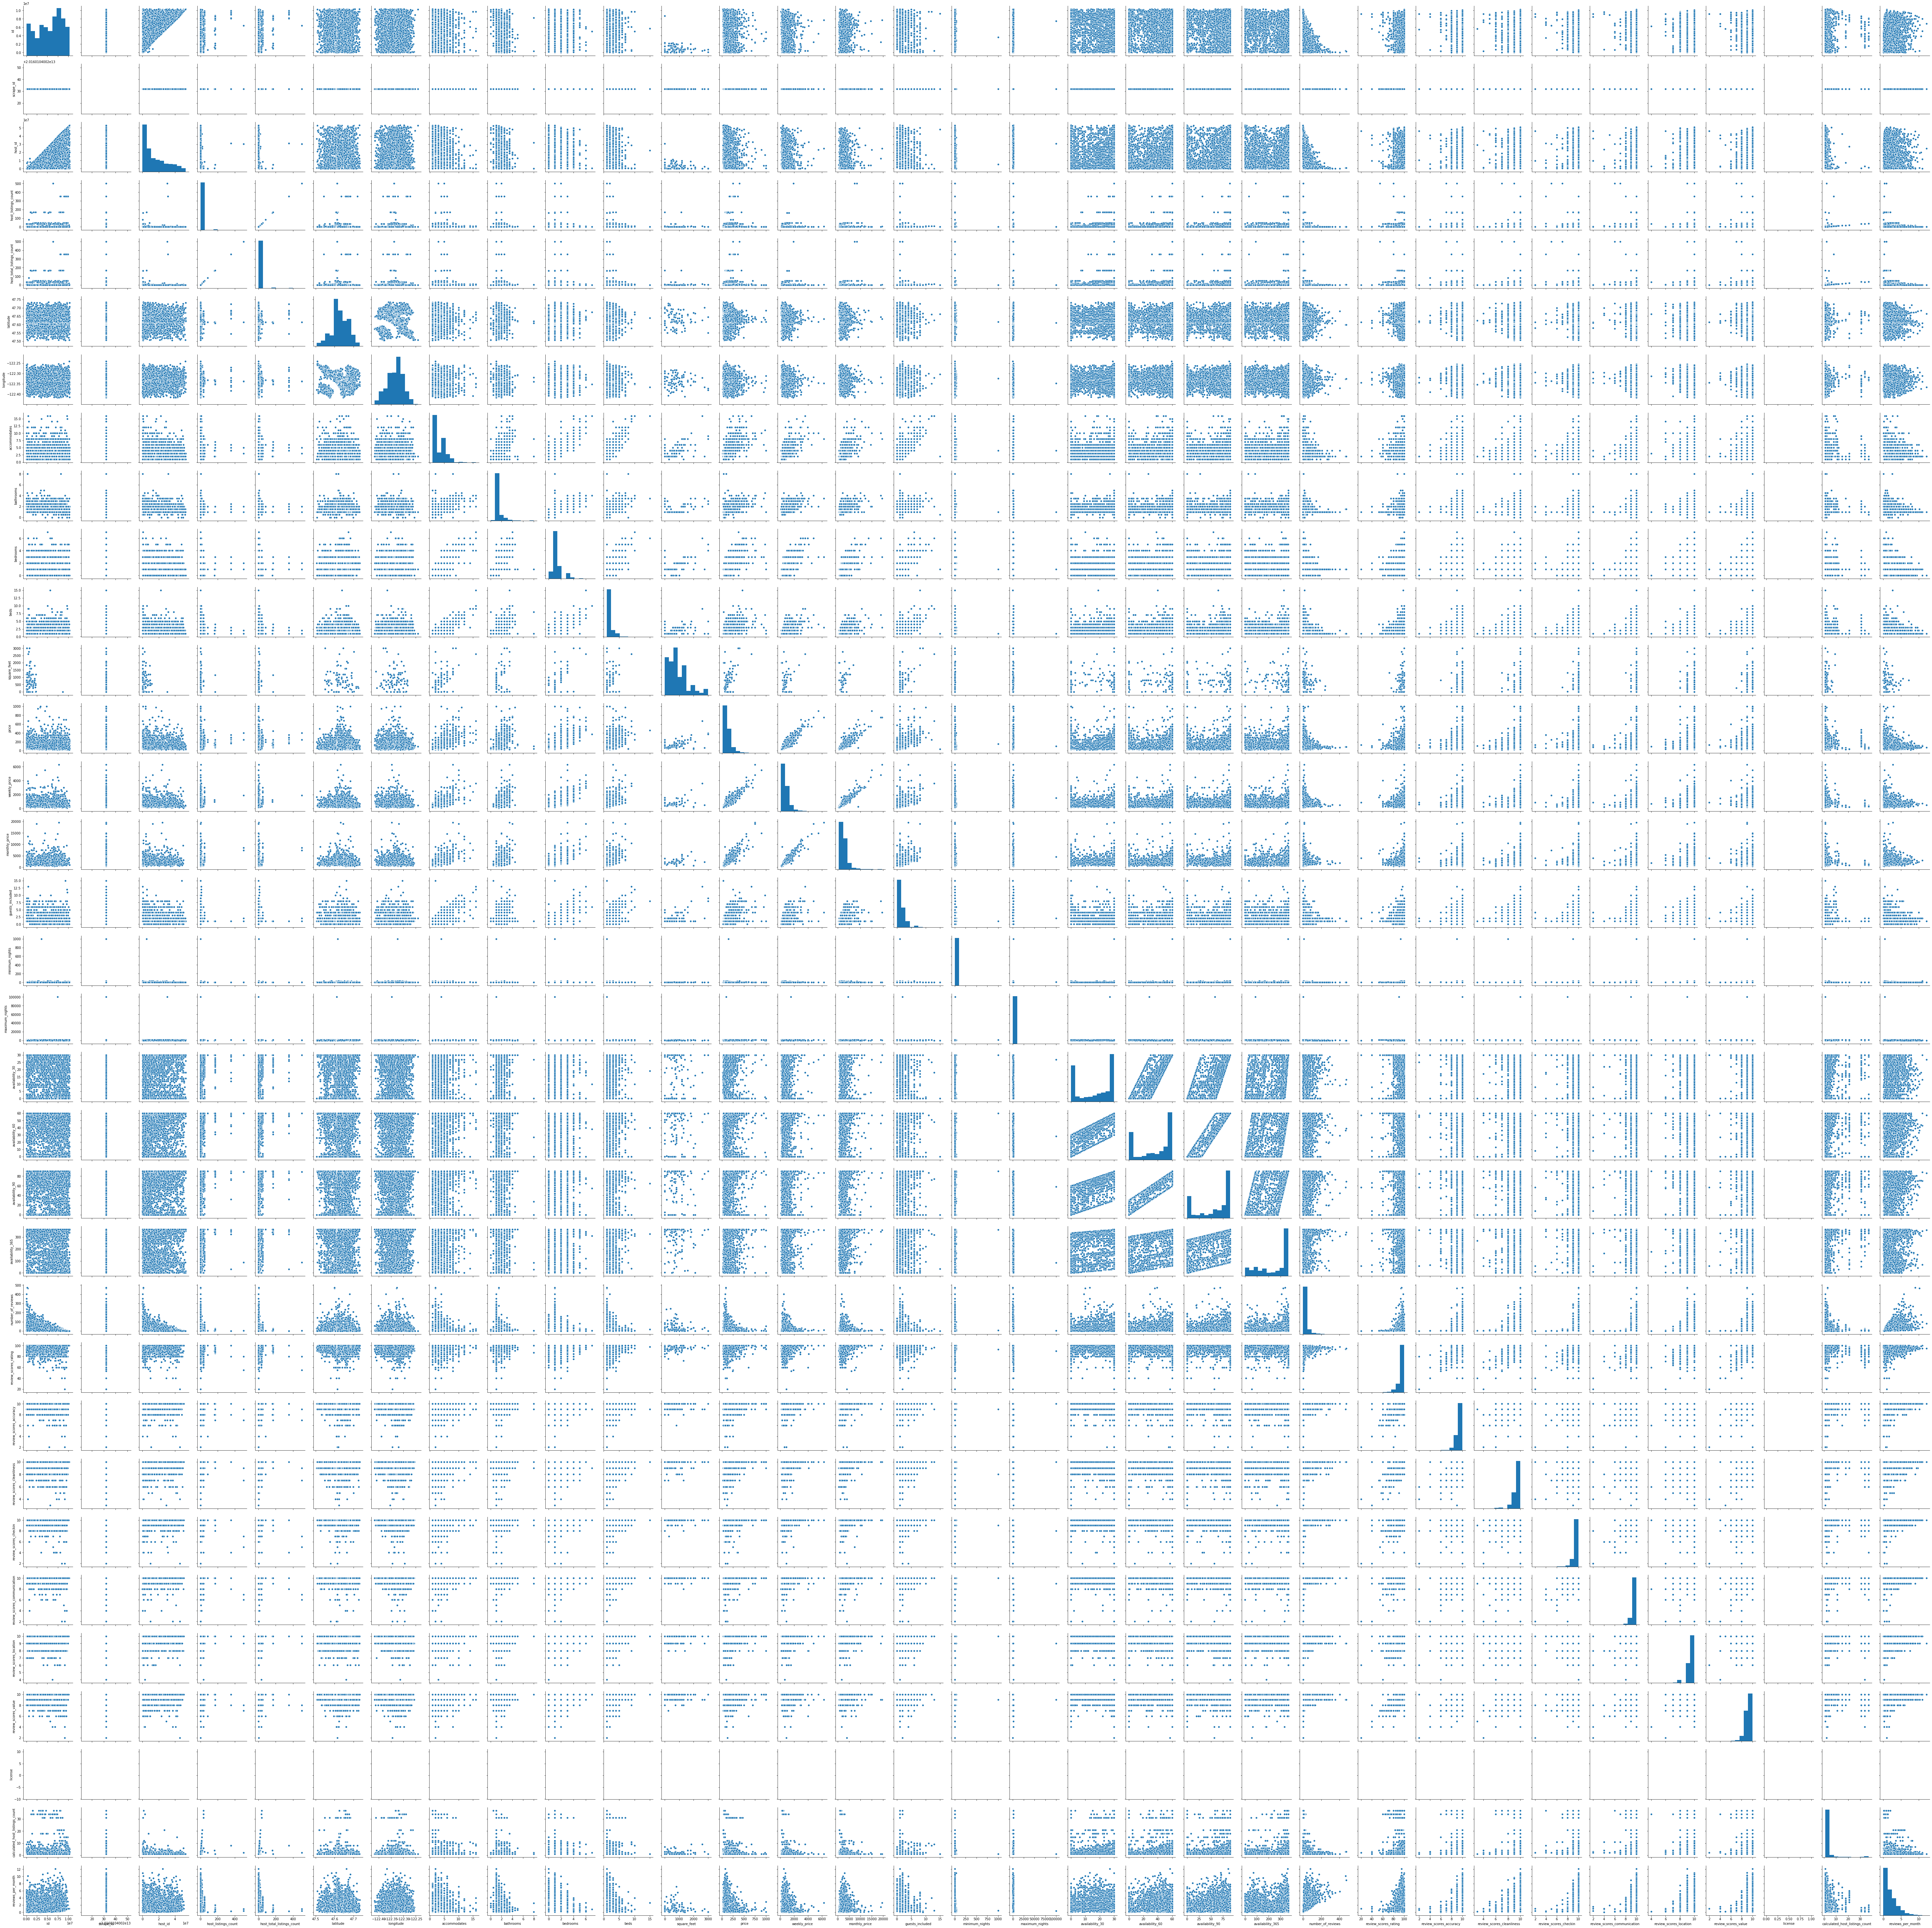

In [43]:
#Lets look at cross plot 
sns.pairplot(df_listings)

In [548]:
df_listings.dtypes.value_counts()

object     61
float64    18
int64      13
dtype: int64

In [44]:
df_listings.columns[df_listings.dtypes != 'O']

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

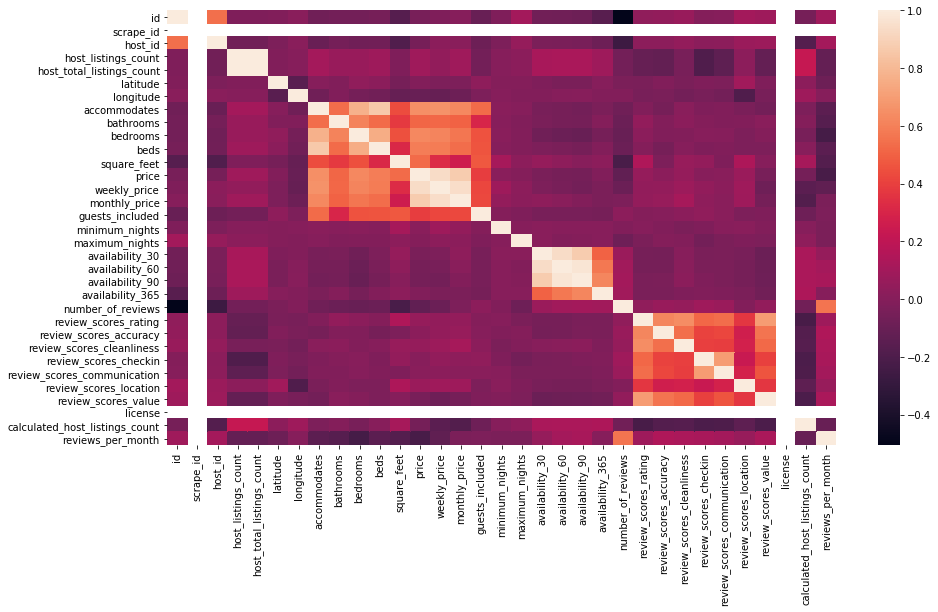

In [45]:
#Lets plot correlatin matrix for numeric variables
cols = df_listings.columns[df_listings.dtypes != 'O']
plt.figure(figsize=(15,8))
sns.heatmap(df_listings[cols].corr())
plt.show()

In [46]:
#Lets look at character variables
df_listings.columns[df_listings.dtypes == 'O']

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'r

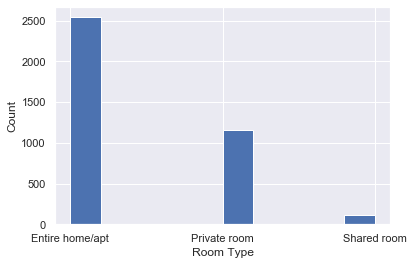

In [47]:
#Lets look at Room Type
sns.set()
_ = plt.hist(df_listings['room_type'])
_ = plt.xlabel("Room Type")
_ = plt.ylabel("Count")
plt.show();

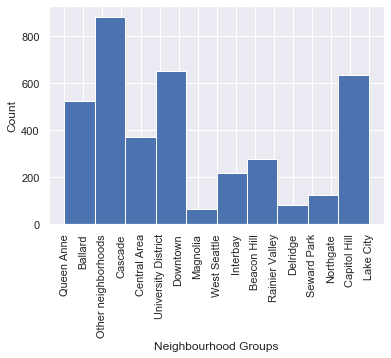

In [48]:
#plt.figure(figsize=(15,8))
sns.set()
_ = plt.hist(df_listings['neighbourhood_group_cleansed'])
_ = plt.xticks(rotation='vertical')
_ = plt.xlabel("Neighbourhood Groups")
_ = plt.ylabel("Count")
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical');
plt.show();

In [49]:
df_listings.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [50]:
df_listings.require_guest_phone_verification.value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

In [51]:
df_listings.require_guest_profile_picture.value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [52]:
# Analyzing Calendar data 
df_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [53]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [54]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [55]:
# Lets looks at listing ids
# Number of unique listing IDs
df_calendar.listing_id.nunique()

3818

In [245]:
# Number of unique dates for listings
df_calendar.date.nunique()

365

In [56]:
# As number of dates are 365, would like to see maximum and minimum values
print("Min date for listings ",df_calendar.date.min())
print("Max date for listings ",df_calendar.date.max())

Min date for listings  2016-01-04
Max date for listings  2017-01-02


In [57]:
df_calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [259]:
# Checking if listing is available and price is Null or vice versa
df_calendar[(df_calendar.available == 't') & (df_calendar.price.isnull())]

Empty DataFrame
Columns: [listing_id, date, available, price]
Index: []

In [60]:
# Updateing Price to convert to int format
df_calendar['price'] = df_calendar['price'].str.replace(',', '')
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].astype(float)

In [61]:
# Checking minimum and maximum price
df_calendar.price.describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

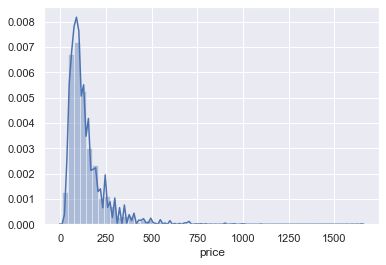

In [62]:
# Checking price distribution
sns.distplot(df_calendar.price);

Calendar dataset has 3818 unique listings with price range from $10 to $1650 with average price of $137.95 for the year 2016.

In [63]:
#Lets look at Reviews dataset
df_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [64]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [65]:
#Lets look at if all 3818 listings has review
df_reviews.listing_id.nunique()

3191

In [66]:
#Lets look at review timelines as calendar data is for 2016
print("Minimum date for review", df_reviews.date.min());
print("maximum date for review", df_reviews.date.max());

Minimum date for review 2009-06-07
maximum date for review 2016-01-03


### Data Preparation for model building

The first step in our process will be to remove all columns with more than 50% missing values. It will be difficult to impute these values since most of the attribute values will be guessed. Next, for the attributes with more than 30% missing values, we will impute them individually. These are Notes, Weekly Price. Notes are freeform text values. Since we will not be doing any natural language processing, we can drop them.

In [67]:
# Missing values
missing_vars = df_listings.isnull().mean()

In [68]:
#Lets look at columns with more than 50% missing rows
missing_gt_50 = df_listings.columns[missing_vars > 0.50]

In [69]:
missing_gt_50

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

In [70]:
#Lets drop columns with greater than 50% missing values
df_listings = df_listings.drop(missing_gt_50, axis=1)

In [71]:
missing_vars[(missing_vars > 0.3) & (missing_vars < 0.5)]

notes           0.420639
weekly_price    0.473808
dtype: float64

In [72]:
df_listings.notes.head()

0                                                  NaN
1    What's up with the free pillows?  Our home was...
2    Our house is located just 5 short blocks to To...
3                                                  NaN
4                                            Belltown 
Name: notes, dtype: object

As column 'notes' is free form text, we will be dropping it. 

In [73]:
df_listings = df_listings.drop('notes', axis=1)

In [549]:
# Converting weekly_price from string to float
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace(',', '')
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace('$', '')
df_listings['weekly_price'] = df_listings['weekly_price'].astype(float)

In [74]:
# Imputing missing values as mean of the column
df_listings['weekly_price'] = df_listings['weekly_price'].fillna(np.mean(df_listings['weekly_price']));

In [75]:
df_listings.weekly_price.head()

0     788.481832
1    1000.000000
2     788.481832
3     650.000000
4     788.481832
Name: weekly_price, dtype: float64

In [76]:
# Lets look at all variable with less than 30% missing values
missing_vars[(missing_vars < 0.3)]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 86, dtype: float64

From the above variables there are different types of variables which need to handle missing data.

In [77]:
# Columns with missing values
missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].index.to_list()

['summary',
 'space',
 'neighborhood_overview',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [78]:
# Attributes
free_text_attributes = ['summary', 'space', 'neighborhood_overview', 'transit', 'host_about'] #5
url_attributes = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url'] #5
numeric_attributes = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'] #11
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'] #3
date_attributes = ['host_since', 'first_review', 'last_review', ] #3
drop_attributes = ['host_location'] #1
char_attributes =['host_response_time', 'host_neighbourhood', 'neighbourhood'] #host_response_time = 'Non Response'
drop_rows_attributes = ['host_listings_count', 'host_total_listings_count'] # IDs (8354452, 10235014)
max_value_attributes = ['zipcode', 'property_type']
median_value_attributes = ['bathrooms', 'bedrooms', 'beds']
money_attributes = ['cleaning_fee']

Host Ids 42515980 & 1075031 have most of the data null, we can delete those rows. #host_listings_count

In [71]:
#Character variables which needs to be one-hot-encoded with dummies
char_attribute = ['experiences_offered', 'host_location', 'host_response_time', 'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

In [ ]:
# Numeric fields which we will impute
numeric_attribute = []

In [79]:
missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].count()

39

In [80]:
missing_vars['bathrooms']

0.0041906757464641176

In [81]:
missing_vars['host_listings_count']

0.0005238344683080147

In [82]:
missing_vars['host_total_listings_count']

0.0005238344683080147

In [83]:
df_listings.host_response_time.value_counts(dropna=False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

In [84]:
df_listings[df_listings.host_listings_count.isnull()]

id                            listing_url       scrape_id  \
1297   8354452   https://www.airbnb.com/rooms/8354452  20160104002432   
1419  10235014  https://www.airbnb.com/rooms/10235014  20160104002432   

     last_scraped                                name  \
1297   2016-01-04   The View | Be Inspired in Seattle   
1419   2016-01-04  Luxury Apartment in Belltown / SLU   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   
1419  Beautiful building near the heart of downtown ...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   
1419                                                NaN   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   
1419  Beautiful building near the heart of downtown ...                none   

                                  neighborhood_overview  ...  \
1297  This spot is in Belltown across the street fro...  ...   
1419                                                NaN  ...   

     review_scores_location review_scores_value requires_license  \
1297                    NaN                 NaN                f   
1419                    NaN                 NaN                f   

     jurisdiction_names instant_bookable  cancellation_policy  \
1297         WASHINGTON                f             moderate   
1419         WASHINGTON                f             flexible   

     require_guest_profile_picture require_guest_phone_verification  \
1297                             f                                f   
1419                             f                                f   

     calculated_host_listings_count reviews_per_month  
1297                              1               NaN  
1419                              1               NaN  

[2 rows x 87 columns]

In [85]:
df_listings.loc[df_listings.host_listings_count.isnull(),'thumbnail_url']

1297    https://a2.muscache.com/ac/pictures/6d46a5de-9...
1419    https://a2.muscache.com/ac/pictures/2644576c-4...
Name: thumbnail_url, dtype: object

In [86]:
df_listings.host_response_rate.isnull().sum()

523

In [87]:
df_listings[df_listings.host_id == 42515980]

id                           listing_url       scrape_id  \
1297  8354452  https://www.airbnb.com/rooms/8354452  20160104002432   

     last_scraped                               name  \
1297   2016-01-04  The View | Be Inspired in Seattle   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   

                                  neighborhood_overview  ...  \
1297  This spot is in Belltown across the street fro...  ...   

     review_scores_location review_scores_value requires_license  \
1297                    NaN                 NaN                f   

     jurisdiction_names instant_bookable  cancellation_policy  \
1297         WASHINGTON                f             moderate   

     require_guest_profile_picture require_guest_phone_verification  \
1297                             f                                f   

     calculated_host_listings_count reviews_per_month  
1297                              1               NaN  

[1 rows x 87 columns]

In [88]:
# Update missing zipcodes with zipcode with maxium value count(i.e. 98122)
df_listings.zipcode.value_counts(dropna=False).idxmax()

'98122'

In [89]:
df_listings[df_listings.zipcode == '99\n98122']

id                           listing_url       scrape_id  \
859  9448215  https://www.airbnb.com/rooms/9448215  20160104002432   

    last_scraped          name  \
859   2016-01-04  Capital hill   

                                               summary space  \
859  Large room in Seattle's best neighborhood,  ca...   NaN   

                                           description experiences_offered  \
859  Large room in Seattle's best neighborhood,  ca...                none   

    neighborhood_overview  ... review_scores_location review_scores_value  \
859                   NaN  ...                   10.0                10.0   

    requires_license jurisdiction_names instant_bookable  cancellation_policy  \
859                f         WASHINGTON                f             flexible   

    require_guest_profile_picture require_guest_phone_verification  \
859                             f                                f   

    calculated_host_listings_count reviews_per_month  
859                              3               1.0  

[1 rows x 87 columns]

In [90]:
df_listings.loc[df_listings.id == 9448215,'zipcode'] = 98122

In [91]:
# There is only 1 Null value in Property Type which should be replaced by max value for property type(i.e. House)
df_listings.property_type.value_counts(dropna=False)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
NaN                   1
Name: property_type, dtype: int64

In [92]:
df_listings[df_listings.property_type.isnull()]

id                        listing_url       scrape_id last_scraped  \
2184  3335  https://www.airbnb.com/rooms/3335  20160104002432   2016-01-04   

                                     name  \
2184  Sweet Seattle Urban Homestead 2 Bdr   

                                                summary  \
2184  Welcome! If you stay here you will be living i...   

                                                  space  \
2184  Welcome!  Come enjoy your time in Seattle at a...   

                                            description experiences_offered  \
2184  Welcome! If you stay here you will be living i...                none   

                                  neighborhood_overview  ...  \
2184  This is a very diverse neighborhood with a var...  ...   

     review_scores_location review_scores_value requires_license  \
2184                    NaN                 NaN                f   

     jurisdiction_names instant_bookable  cancellation_policy  \
2184         WASHINGTON                f               strict   

     require_guest_profile_picture require_guest_phone_verification  \
2184                             f                                f   

     calculated_host_listings_count reviews_per_month  
2184                              4               NaN  

[1 rows x 87 columns]

In [93]:
df_listings.bathrooms.value_counts(dropna=False)

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
NaN      16
0.0       8
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [94]:
df_listings.bathrooms.median()

1.0

In [95]:
df_listings.bedrooms.value_counts(dropna=False)

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
NaN       6
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [96]:
df_listings.bedrooms.median()

1.0

In [97]:
df_listings.beds.value_counts(dropna=False)

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
8.0        4
9.0        4
10.0       2
NaN        1
15.0       1
Name: beds, dtype: int64

In [98]:
df_listings.cleaning_fee.value_counts(dropna=False)

NaN        1030
$50.00      310
$25.00      245
$60.00      185
$20.00      171
           ... 
$178.00       1
$79.00        1
$189.00       1
$117.00       1
$185.00       1
Name: cleaning_fee, Length: 119, dtype: int64

In [552]:
# Updating missing values for various attributes 
# Free text: As we are not doing any Natural Language Processing on Free Text we will be deleting free text attributes
df_listings = df_listings.drop(free_text_attributes, axis=1);

# url_attributes: As we cannot update missing URLs with new one we will be deleting those columns as well
df_listings = df_listings.drop(url_attributes, axis=1);

# We will be dropping host location
df_listings = df_listings.drop(drop_attributes , axis=1);

# We will be dropping 2 rows as those are the missing values for 'host_listings_count' & 'host_total_listings_count'
df_listings = df_listings.dropna(subset=drop_rows_attributes, axis=0);

# We will be updating missing values for numeric attributes with mean of the column
#df_listings[numeric_attributes] = df_listings[numeric_attributes].apply(lambda x: x.fillna(x.mean()),axis=0);

# For missing Host Response Time we can update those with 'Non Response'
df_listings['host_response_time'] = df_listings['host_response_time'].fillna('Non Response');

# We will be updating missing values for first_review and last_review using forward fill method
df_listings['first_review'] = df_listings['first_review'].fillna(method='ffill');
df_listings['last_review'] = df_listings['last_review'].fillna(method='ffill');

# We will be updating missing values for host_neighbourhood & neighbourhood with mode
df_listings['host_neighbourhood'] = df_listings['host_neighbourhood'].fillna(df_listings.host_neighbourhood.value_counts().index[0]);
df_listings['neighbourhood'] = df_listings['neighbourhood'].fillna(df_listings.neighbourhood.value_counts().index[0]);

# We will be updating median_value_attributes with median
df_listings[median_value_attributes] = df_listings[median_value_attributes].apply(lambda x: x.fillna(x.median()),axis=0);

# We will be updating max value attributes with mode
df_listings[max_value_attributes] = df_listings[max_value_attributes].apply(lambda x: x.fillna(x.value_counts().index[0]));

# We will be updating money attribute with mean after they are converted to numeric
df_listings[money_attributes] = df_listings[money_attributes].str.replace(',', '');
df_listings[money_attributes] = df_listings[money_attributes].str.replace('$', '');
df_listings[money_attributes] = df_listings[money_attributes].astype(float);
df_listings[money_attributes] = df_listings[money_attributes].apply(lambda x: x.fillna(x.mean()),axis=0);

#free_text_attributes = ['summary', 'space', 'neighborhood_overview', 'transit', 'host_about'] #5
#url_attributes = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url'] #5
#numeric_attributes = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'] #11
#bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'] #3 Can be taken care by deleting 2 rows
#date_attributes = ['host_since', 'first_review', 'last_review', ] #3 host_since can be managed by dropping 2 rows
#drop_attributes = ['host_location'] #1
#char_attributes =['host_response_time', 'host_neighbourhood', 'neighbourhood'] #host_response_time = 'Non Response'
#drop_rows_attributes = ['host_listings_count', 'host_total_listings_count'] # IDs (8354452, 10235014)
#max_value_attributes = ['zipcode', 'property_type']
#median_value_attributes = ['bathrooms', 'bedrooms', 'beds']
#money_attributes = ['cleaning_fee']

TypeError: can only concatenate str (not "int") to str

In [99]:
# Updating missing values for various attributes 
# Free text: As we are not doing any Natural Language Processing on Free Text we will be deleting free text attributes
df_listings = df_listings.drop(free_text_attributes, axis=1);

# url_attributes: As we cannot update missing URLs with new one we will be deleting those columns as well
df_listings = df_listings.drop(url_attributes, axis=1);

# We will be dropping host location
df_listings = df_listings.drop(drop_attributes , axis=1);

# We will be dropping 2 rows as those are the missing values for 'host_listings_count' & 'host_total_listings_count'
df_listings = df_listings.dropna(subset=drop_rows_attributes, axis=0);

In [100]:
# For missing Host Response Time we can update those with 'Non Response'
df_listings['host_response_time'] = df_listings['host_response_time'].fillna('Non Response');

# We will be updating missing values for first_review and last_review using forward fill method
df_listings['first_review'] = df_listings['first_review'].fillna(method='ffill');
df_listings['last_review'] = df_listings['last_review'].fillna(method='ffill');

In [101]:
# We will be updating missing values for host_neighbourhood & neighbourhood with mode
df_listings['host_neighbourhood'] = df_listings['host_neighbourhood'].fillna(df_listings.host_neighbourhood.value_counts().index[0]);
df_listings['neighbourhood'] = df_listings['neighbourhood'].fillna(df_listings.neighbourhood.value_counts().index[0]);

In [102]:
# We will be updating max value attributes with mode
df_listings[max_value_attributes] = df_listings[max_value_attributes].apply(lambda x: x.fillna(x.value_counts().index[0]));

In [103]:
# We will be updating median_value_attributes with median
df_listings[median_value_attributes] = df_listings[median_value_attributes].apply(lambda x: x.fillna(x.median()),axis=0);

In [104]:
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace(',', '');
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace('$', '');
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].astype(float);

In [105]:
df_listings.cleaning_fee.isna().sum()

1029

In [106]:
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].fillna(round(df_listings['cleaning_fee'].mean(),2));

In [107]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace("%", "").astype(float);
df_listings['host_response_rate'] = df_listings['host_response_rate'].fillna(round(df_listings['host_response_rate'].mean(),2));

In [108]:
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace("%", "").astype(float);

In [109]:
# We will be updating missing values for numeric attributes with mean of the column
df_listings[numeric_attributes] = df_listings[numeric_attributes].apply(lambda x: x.fillna(round(x.mean(),2)));

All missing values has been taken care of. 
Lets creat dummy variables for character variable

In [110]:
df_listings.columns[df_listings.dtypes == 'O']

Index(['listing_url', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [111]:
len(df_listings.columns[df_listings.dtypes == 'O'])

43

In [112]:
#Lets drop columns which we will not be able to use such as urls, descriptions
df_listings = df_listings.drop(['listing_url', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_url', 'host_name'], axis=1);

In [113]:
date_attributes_f = ['host_since', 'first_review', 'last_review']

In [114]:
boolean_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [115]:
char_attributes = ['host_response_time', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'bed_type', 'calendar_updated', 'cancellation_policy']

In [116]:
array_attributes = ['host_verifications', 'amenities']

In [117]:
dollar_value_as_factor = ['extra_people']

In [ ]:
need_to_think = ['street']

In [ ]:
# neighbourhood & host neighbourhood are almost same 
# city is Seattle
# state is same 'WA'
# market is 'Seattle'
# smart_location is 'Seattle, WA'
# country_code is 'US'
# country is "United States"
# has_availability is 't'
# calendar_last_scraped is '2016-01-04'
# requires_license is 'f'
# jurisdiction_names is 'WASHINGTON'
dropped_attributes = ['neighbourhood', 'host_neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names', '']

In [118]:
df_listings.columns[df_listings.dtypes != 'O']

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [ ]:
(df_listings.host_listings_count)

In [119]:
df_listings.shape[1]

68

In [120]:
df_listings.street.nunique()

1442

In [121]:
# Lets convert date variable to numeric factors
listings_date_factors = df_listings[date_attributes_f].apply(lambda col: pd.factorize(col, sort=True)[0]);

In [742]:
test_bool = df_listings.loc[:,('host_is_superhost', 'host_has_profile_pic')]

In [743]:
test_bool.head()

host_is_superhost host_has_profile_pic
0                 f                    t
1                 t                    t
2                 f                    t
3                 f                    t
4                 f                    t

In [737]:
test_bool_col = ['host_is_superhost', 'host_has_profile_pic']

In [ ]:
df.apply(lambda col: col * 4 if col.name == 'a' or col.name == 'b' 
         else col * 7 if col.name == 'CZK_fwdp' 
         else col * 5, axis=0).rename(mapper=mapper, axis=1)

In [740]:
test_bool1 = test_bool[test_bool_col].applymap(x: x.replace(lambda x: 1 if x==True else 0)
#lambda x: 1 if x==True else 0

In [747]:
test_bool1 = test_bool[test_bool_col].apply(lambda col: col.replace('t', 1).replace('f', 0))

In [122]:
df_listings[boolean_attributes].head()

host_is_superhost host_has_profile_pic host_identity_verified  \
0                 f                    t                      t   
1                 t                    t                      t   
2                 f                    t                      t   
3                 f                    t                      t   
4                 f                    t                      t   

  is_location_exact instant_bookable require_guest_profile_picture  \
0                 t                f                             f   
1                 t                f                             t   
2                 t                f                             f   
3                 t                f                             f   
4                 t                f                             f   

  require_guest_phone_verification  
0                                f  
1                                t  
2                                f  
3                                f  
4                                f

In [123]:
# For boolean_attributes, lets replace 't' with 1 and 'f' with 0
listings_boolean_factors = df_listings[boolean_attributes].apply(lambda col: col.replace('t', 1).replace('f', 0))

In [124]:
listings_boolean_factors.head()

host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                  0                     1                       1   
1                  1                     1                       1   
2                  0                     1                       1   
3                  0                     1                       1   
4                  0                     1                       1   

   is_location_exact  instant_bookable  require_guest_profile_picture  \
0                  1                 0                              0   
1                  1                 0                              1   
2                  1                 0                              0   
3                  1                 0                              0   
4                  1                 0                              0   

   require_guest_phone_verification  
0                                 0  
1                                 1  
2                                 0  
3                                 0  
4                                 0

In [125]:
#Lets create dummy variables for categorical variables
#Note: as column name was long, prefix was creating error 
listings_categorical_factors = pd.get_dummies(df_listings[char_attributes]);
#pd.get_dummies(test_char, prefix=test_char.columns.values, prefix_sep='_', drop_first=True)

In [765]:
test_char = df_listings.loc[:,('host_response_time', 'neighbourhood_group_cleansed')]

In [767]:
test_char.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               528
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [771]:
test_char_dummy = pd.get_dummies(test_char, prefix=test_char.columns.values, prefix_sep='_', drop_first=True)

In [772]:
test_char_dummy.head()

host_response_time_a few days or more  host_response_time_within a day  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   host_response_time_within a few hours  host_response_time_within an hour  \
0                                      1                                  0   
1                                      0                                  1   
2                                      1                                  0   
3                                      0                                  0   
4                                      0                                  1   

   neighbourhood_group_cleansed_Beacon Hill  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   neighbourhood_group_cleansed_Capitol Hill  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   neighbourhood_group_cleansed_Cascade  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   neighbourhood_group_cleansed_Central Area  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   neighbourhood_group_cleansed_Delridge  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   neighbourhood_group_cleansed_Downtown  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   neighbourhood_group_cleansed_Interbay  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   neighbourhood_group_cleansed_Lake City  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   neighbourhood_group_cleansed_Magnolia  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   neighbourhood_group_cleansed_Northgate  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   neighbourhood_group_cleansed_Other neighborhoods  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   neighbour

In [126]:
df_listings.host_response_time.head()

0    within a few hours
1        within an hour
2    within a few hours
3          Non Response
4        within an hour
Name: host_response_time, dtype: object

In [ ]:
(x==True, 1, 0)

In [736]:
test_bool1.host_is_superhost.value_counts()

0    3816
Name: host_is_superhost, dtype: int64

In [712]:
test_date = df_listings.loc[:,date_attributes_f]

In [713]:
test_date.head()

host_since first_review last_review
0  2011-08-11   2011-11-01  2016-01-02
1  2013-02-21   2013-08-19  2015-12-29
2  2014-06-12   2014-07-30  2015-09-03
3  2013-11-06   2014-07-30  2015-09-03
4  2011-11-29   2012-07-10  2015-10-24

In [714]:
test_date_factors = test_date[date_attributes_f].apply(lambda col: pd.factorize(col, sort=True)[0]);

In [715]:
test_date_factors.head()

host_since  first_review  last_review
0         177            76          319
1         504           309          315
2         872           522          200
3         707           522          200
4         237           152          250

In [127]:
df_listings.host_verifications.head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [128]:
df_listings.host_verifications.value_counts()

['email', 'phone', 'facebook', 'reviews', 'kba']                               595
['email', 'phone', 'reviews', 'kba']                                           436
['email', 'phone', 'reviews']                                                  329
['email', 'phone', 'facebook', 'reviews', 'jumio']                             322
['email', 'phone', 'reviews', 'jumio']                                         194
                                                                              ... 
['phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']                  1
['email', 'phone', 'facebook', 'google', 'amex', 'reviews', 'jumio']             1
['email', 'phone', 'facebook', 'reviews', 'manual_offline', 'jumio', 'kba']      1
['email', 'phone', 'facebook', 'google', 'linkedin', 'kba']                      1
['phone', 'facebook', 'jumio']                                                   1
Name: host_verifications, Length: 115, dtype: int64

In [780]:
#Test host Verification
test_array_host_verification = pd.DataFrame(df_listings['host_verifications'].str.split(',', expand=True).values.tolist())

In [781]:
test_array_host_verification.head()

0         1            2            3           4          5     6  \
0  ['email'   'phone'    'reviews'       'kba']        None       None  None   
1  ['email'   'phone'   'facebook'   'linkedin'   'reviews'   'jumio']  None   
2  ['email'   'phone'     'google'    'reviews'    'jumio']       None  None   
3  ['email'   'phone'   'facebook'    'reviews'    'jumio']       None  None   
4  ['email'   'phone'   'facebook'    'reviews'      'kba']       None  None   

      7  
0  None  
1  None  
2  None  
3  None  
4  None

In [129]:
df_listings.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                               45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                           11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                            

In [130]:
#Lets clean the array attributes and then create dummy variables for each individual entity
def array_clean(arr):
    arr = arr.str.replace('[', '').str.replace(']', '').str.replace("'",'');
    arr = arr.str.replace('{', '').str.replace('}', '').str.replace('"', '');
    return arr;

listings_arr_clean = df_listings[array_attributes].apply(lambda col: array_clean(col));

listings_array_dummy = [];
for col in listings_arr_clean.columns:
    l_dummy_arrs = listings_arr_clean[col].str.get_dummies(sep=',');
    l_dummy_arrs = l_dummy_arrs.add_prefix(col + '_');
    listings_array_dummy.append(l_dummy_arrs);
    
listings_array_factors = pd.concat(listings_array_dummy, axis=1);

In [131]:
listings_array_factors.head()

host_verifications_ amex  host_verifications_ facebook  \
0                         0                             0   
1                         0                             1   
2                         0                             0   
3                         0                             1   
4                         0                             1   

   host_verifications_ google  host_verifications_ jumio  \
0                           0                          0   
1                           0                          1   
2                           1                          1   
3                           0                          1   
4                           0                          0   

   host_verifications_ kba  host_verifications_ linkedin  \
0                        1                             0   
1                        0                             1   
2                        0                             0   
3                        0                             0   
4                        1                             0   

   host_verifications_ manual_offline  host_verifications_ manual_online  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   host_verifications_ phone  host_verifications_ photographer  ...  \
0                          1                                 0  ...   
1                          1                                 0  ...   
2                          1                                 0  ...   
3                          1                                 0  ...   
4                          1                                 0  ...   

   amenities_Safety Card  amenities_Shampoo  amenities_Smoke Detector  \
0                      0                  0                         0   
1                      1                  0                         1   
2                      0                  1                         1   
3                      1                  1                         1   
4                      0                  1                         1   

   amenities_Smoking Allowed  amenities_Suitable for Events  amenities_TV  \
0                          0                              0             1   
1                          0                              0             1   
2                          0                              0             1   
3                          0                              0             0   
4                          0                              0             1   

   amenities_Washer  amenities_Washer / Dryer  \
0                 1                         0   
1                 1                         0   
2                 1                         0   
3                 1                         0   
4                 0                         0   

   amenities_Wheelchair Accessible  amenities_Wireless Internet  
0                                0                            1  
1                                0                            1  
2                                0                            1  
3                                0                            1  
4                                0                            1  

[5 rows x 58 columns]

In [132]:
df_listings.extra_people.value_counts()

$0.00      2047
$10.00      355
$25.00      321
$15.00      309
$20.00      308
$50.00      113
$30.00       85
$5.00        58
$40.00       39
$35.00       35
$100.00      16
$75.00       14
$7.00        12
$45.00       10
$29.00        9
$60.00        8
$8.00         8
$12.00        8
$17.00        6
$18.00        6
$19.00        5
$9.00         5
$6.00         4
$14.00        4
$55.00        3
$80.00        3
$28.00        3
$300.00       2
$200.00       2
$22.00        2
$49.00        2
$44.00        1
$68.00        1
$21.00        1
$36.00        1
$175.00       1
$48.00        1
$250.00       1
$71.00        1
$13.00        1
$16.00        1
$27.00        1
$85.00        1
$26.00        1
$33.00        1
Name: extra_people, dtype: int64

In [133]:
#Lets convert extra_people to factor by cleaning $ sign and converting to float
listings_dollar_factors = pd.DataFrame(df_listings['extra_people'])
listings_dollar_factors['extra_people'] = listings_dollar_factors['extra_people'].str.replace('$', '')
listings_dollar_factors['extra_people'] = listings_dollar_factors['extra_people'].str.replace(',', '')
listings_dollar_factors['extra_people'] = listings_dollar_factors['extra_people'].astype(float)

In [134]:
listings_dollar_factors.head()

extra_people
0           5.0
1           0.0
2          25.0
3           0.0
4          15.0

In [789]:
test_arr_clean = test_array[array_attributes].apply(lambda col: array_clean(col));

In [790]:
test_arr_clean.head()

host_verifications  \
0                        email, phone, reviews, kba   
1  email, phone, facebook, linkedin, reviews, jumio   
2              email, phone, google, reviews, jumio   
3            email, phone, facebook, reviews, jumio   
4              email, phone, facebook, reviews, kba   

                                           amenities  
0  TV,Cable TV,Internet,Wireless Internet,Air Con...  
1  TV,Internet,Wireless Internet,Kitchen,Free Par...  
2  TV,Cable TV,Internet,Wireless Internet,Air Con...  
3  Internet,Wireless Internet,Kitchen,Indoor Fire...  
4  TV,Cable TV,Internet,Wireless Internet,Kitchen...

In [106]:
df_listings.require_guest_phone_verification.value_counts()

f    3441
t     375
Name: require_guest_phone_verification, dtype: int64

In [681]:
df_listings.is_location_exact.nunique()

87

In [682]:
df_listings.loc[:,('neighbourhood_cleansed','neighbourhood_group_cleansed')].head()

neighbourhood_cleansed neighbourhood_group_cleansed
0        West Queen Anne                   Queen Anne
1        West Queen Anne                   Queen Anne
2        West Queen Anne                   Queen Anne
3        West Queen Anne                   Queen Anne
4        West Queen Anne                   Queen Anne

In [135]:
#Lets merge all categorical columns 
df_listings_categorical = pd.concat([listings_date_factors, listings_boolean_factors , listings_array_factors, listings_categorical_factors], axis=1)

In [136]:
df_listings_categorical.head()

host_since  first_review  last_review  host_is_superhost  \
0         177            76          319                  0   
1         504           309          315                  1   
2         872           522          200                  0   
3         707           522          200                  0   
4         237           152          250                  0   

   host_has_profile_pic  host_identity_verified  is_location_exact  \
0                     1                       1                  1   
1                     1                       1                  1   
2                     1                       1                  1   
3                     1                       1                  1   
4                     1                       1                  1   

   instant_bookable  require_guest_profile_picture  \
0                 0                              0   
1                 0                              1   
2                 0                              0   
3                 0                              0   
4                 0                              0   

   require_guest_phone_verification  ...  calendar_updated_7 weeks ago  \
0                                 0  ...                             0   
1                                 1  ...                             0   
2                                 0  ...                             0   
3                                 0  ...                             0   
4                                 0  ...                             1   

   calendar_updated_8 months ago  calendar_updated_9 months ago  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   calendar_updated_a week ago  calendar_updated_never  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   calendar_updated_today  calendar_updated_yesterday  \
0                       0                           0   
1                       1                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             1   
1                             0                             0   
2                             0                             0   
3                             1                             0   
4                             0                             0   

   cancellation_policy_strict  
0                           0  
1                           1  
2                           1  
3                           0  
4                           1  

[5 rows x 266 columns]

In [137]:
df_listings_categorical.last_review.value_counts()

318    113
287    113
319    105
285    102
316     90
      ... 
93       1
91       1
87       1
85       1
0        1
Name: last_review, Length: 321, dtype: int64

In [138]:
#Lets look at the columns which are non catogorial 
df_listings.columns[df_listings.dtypes != 'O']

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [139]:
# From non-catogorical columns we won't need columns such as 'id', 'scape_id', 'host_id', 
numeric_attributes = df_listings.columns[df_listings.dtypes != 'O']
df_listings_numeric = df_listings[numeric_attributes]

In [140]:
df_listings_numeric.head()

id       scrape_id   host_id  host_response_rate  \
0   241032  20160104002432    956883               96.00   
1   953595  20160104002432   5177328               98.00   
2  3308979  20160104002432  16708587               67.00   
3  7421966  20160104002432   9851441               94.89   
4   278830  20160104002432   1452570              100.00   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                100.00                  3.0                        3.0   
1                100.00                  6.0                        6.0   
2                100.00                  2.0                        2.0   
3                 99.97                  1.0                        1.0   
4                 99.97                  2.0                        2.0   

    latitude   longitude  accommodates  ...  number_of_reviews  \
0  47.636289 -122.371025             4  ...                207   
1  47.639123 -122.365666             4  ...                 43   
2  47.629724 -122.369483            11  ...                 20   
3  47.638473 -122.369279             3  ...                  0   
4  47.632918 -122.372471             6  ...                 38   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 95.00                   10.00                      10.00   
1                 96.00                   10.00                      10.00   
2                 97.00                   10.00                      10.00   
3                 94.54                    9.64                       9.56   
4                 92.00                    9.00                       9.00   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                  10.00                        10.00                    9.00   
1                  10.00                        10.00                   10.00   
2                  10.00                        10.00                   10.00   
3                   9.79                         9.81                    9.61   
4                  10.00                        10.00                    9.00   

   review_scores_value  calculated_host_listings_count  reviews_per_month  
0                10.00                               2               4.07  
1                10.00                               6               1.48  
2                10.00                               2               1.15  
3                 9.45                               1               2.08  
4                 9.00                               1               0.89  

[5 rows x 33 columns]

In [115]:
df_listings_numeric.shape

(3816, 33)

In [141]:
df_listings_numeric = df_listings_numeric.drop(['id', 'scrape_id', 'host_id', 'latitude', 'longitude'], axis=1)

In [142]:
df_listings_numeric.shape

(3816, 28)

In [949]:
test_numeric = pd.DataFrame(data = df_listings_numeric)

In [950]:
# Standardizing Numeric features
scaler = MinMaxScaler()
test_numeric = pd.DataFrame(data = df_listings_numeric)
test_numeric = scaler.fit_transform(test_numeric)

In [954]:
pd.DataFrame(test_numeric).head()

0       1         2         3         4       5         6         7  \
0  0.951807  1.0000  0.003992  0.003992  0.200000  0.1250  0.142857  0.000000   
1  0.975904  1.0000  0.009980  0.009980  0.200000  0.1250  0.142857  0.000000   
2  0.602410  1.0000  0.001996  0.001996  0.666667  0.5625  0.714286  0.428571   
3  0.938434  0.9997  0.000000  0.000000  0.133333  0.1250  0.000000  0.071429   
4  1.000000  0.9997  0.001996  0.001996  0.333333  0.2500  0.428571  0.142857   

          8         9        10        11        12       13        14  \
0  0.066327  0.111045  0.192271  0.133333  0.000000  0.00364  0.466667   
1  0.132653  0.145161  0.118644  0.066667  0.001001  0.00089  0.433333   
2  0.974490  0.111045  1.000000  0.666667  0.003003  0.00029  0.033333   
3  0.081633  0.088710  0.192271  0.066667  0.000000  0.01124  0.000000   
4  0.438776  0.111045  0.406780  0.400000  0.000000  0.01124  1.000000   

         15        16        17        18       19     20        21       22  \
0  0.683333  0.788889  0.947945  0.436709  0.93750  1.000  1.000000  1.00000   
1  0.216667  0.177778  0.797260  0.090717  0.95000  1.000  1.000000  1.00000   
2  0.100000  0.188889  0.602740  0.042194  0.96250  1.000  1.000000  1.00000   
3  0.000000  0.000000  0.391781  0.000000  0.93175  0.955  0.937143  0.97375   
4  1.000000  1.000000  1.000000  0.080169  0.90000  0.875  0.857143  1.00000   

        23        24       25        26        27  
0  1.00000  0.833333  1.00000  0.027778  0.333883  
1  1.00000  1.000000  1.00000  0.138889  0.120363  
2  1.00000  1.000000  1.00000  0.027778  0.093157  
3  0.97625  0.935000  0.93125  0.000000  0.169827  
4  1.00000  0.833333  0.87500  0.000000  0.071723

In [143]:
# Cleaned Listings dataset
df_listings_cleaned = pd.concat([df_listings_categorical, df_listings_numeric], axis=1);

In [144]:
df_listings_cleaned.shape

(3816, 294)

In [145]:
df_listings_cleaned.isna().sum().sum()

0

In [671]:
df_listings.neighbourhood

81

In [677]:
df_listings.neighbourhood_group_cleansed.unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [673]:
set(df_listings.host_neighbourhood).difference(set(df_listings.neighbourhood))

{'Anaheim',
 'Baldwin Hills',
 'Beverly Hills',
 'Central San Pedro',
 'Clairemont Mesa East',
 'Downtown Toronto',
 'East Village',
 'Fenway/Kenmore',
 'Forestland',
 "Hell's Kitchen",
 'Holly',
 'Hollywood',
 'Huntington Beach',
 'Jamaica Plain',
 'Kaanapali',
 'Kauaʻi',
 'Long Beach',
 'Manhattan Beach',
 'Mission District',
 'North Hollywood',
 'Northwest District',
 'Santa Monica',
 'Waianae Coast'}

In [579]:
df_listings.cleaning_fee.head()

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

In [580]:
df_listings.cleaning_fee.isnull().sum()

1029

In [543]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'cleaning_fee', 'guests_included', 'extra_people',
    

In [514]:
min(pd.to_datetime(df_listings['first_review']))

Timestamp('2009-06-07 00:00:00')

In [517]:
max(pd.to_datetime(df_listings['first_review']))

Timestamp('2016-01-03 00:00:00')

In [539]:
df_listings.host_neighbourhood.value_counts().index[0]

'Capitol Hill'

In [534]:
df_test_DT = df_listings[['first_review','last_review']].head()

In [535]:
df_test_DT

first_review last_review
0   2011-11-01  2016-01-02
1   2013-08-19  2015-12-29
2   2014-07-30  2015-09-03
3          NaN         NaN
4   2012-07-10  2015-10-24

In [536]:
df_test_DT['first_review'] = df_test_DT['first_review'].fillna(method='ffill')

In [537]:
df_test_DT

first_review last_review
0   2011-11-01  2016-01-02
1   2013-08-19  2015-12-29
2   2014-07-30  2015-09-03
3   2014-07-30         NaN
4   2012-07-10  2015-10-24

In [520]:
df_listings[df_listings.first_review.isna()].head()

id                            listing_url       scrape_id  \
3    7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
18   7735464   https://www.airbnb.com/rooms/7735464  20160104002432   
23  10106055  https://www.airbnb.com/rooms/10106055  20160104002432   
26   9025039   https://www.airbnb.com/rooms/9025039  20160104002432   
46   9550869   https://www.airbnb.com/rooms/9550869  20160104002432   

   last_scraped                                name  \
3    2016-01-04                  Queen Anne Chateau   
18   2016-01-04    Queen Anne Getaway Near Seattle!   
23   2016-01-04  Cozy Lower Level, Upper Queen Anne   
26   2016-01-04  Cute Bungalow-Close to Everything!   
46   2016-01-04                Queen Anne Craftsman   

                                              summary  \
3   A charming apartment that sits atop Queen Anne...   
18  The second room in our spacious 2BR / 2 Bath a...   
23  Greetings!  Our home is a beautiful, 1920's 4 ...   
26  Our cozy little bungalow is the perfect place ...   
46  Beautiful craftsman in the center of Queen Ann...   

                                                space  \
3                                                 NaN   
18                                                NaN   
23  The space we are renting is the entire lower l...   
26  One bedroom has a queen sized bed, and the oth...   
46  This historic Queen Anne home was redone with ...   

                                          description experiences_offered  \
3   A charming apartment that sits atop Queen Anne...                none   
18  The second room in our spacious 2BR / 2 Bath a...                none   
23  Greetings!  Our home is a beautiful, 1920's 4 ...                none   
26  Our cozy little bungalow is the perfect place ...                none   
46  Beautiful craftsman in the center of Queen Ann...                none   

                                neighborhood_overview  \
3                                                 NaN   
18                                                NaN   
23  Queen Anne is a lovely and venerable Seattle n...   
26  The Queen Anne neighborhood is one of the most...   
46  Queen Anne is a beautiful neighborhood atop a ...   

                                              transit  \
3                                                 NaN   
18                                                NaN   
23  Our home is conveniently located within walkin...   
26  There are several bus routes a few short steps...   
46  Public: The house is located across the street...   

                                        thumbnail_url  \
3                                                 NaN   
18  https://a2.muscache.com/ac/pictures/98338372/c...   
23  https://a2.muscache.com/ac/pictures/3f11eb1a-3...   
26                                                NaN   
46                                                NaN   

                                           medium_url  \
3                                                 NaN   
18  https://a2.muscache.com/im/pictures/98338372/c...   
23  https://a2.muscache.com/im/pictures/3f11eb1a-3...   
26                                                NaN   
46                                                NaN   

                                          picture_url  \
3   https://a0.muscache.com/ac/pictures/94146944/6...   
18  https://a2.muscache.com/ac/pictures/98338372/c...   
23  https://a2.muscache.com/ac/pictures/3f11eb1a-3...   
26  https://a2.muscache.com/ac/pictures/21a1c1e1-f...   
46  https://a2.muscache.com/ac/pictures/6b206f9d-c...   

                                       xl_picture_url   host_id  \
3                                                 NaN   9851441   
18  https://a2.muscache.com/ac/pictures/98338372/c...   6170760   
23  https://a2.muscache.com/ac/pictures/3f11eb1a-3...  51860756   
26                                                NaN     68155   
46                                                NaN

In [518]:
df_listings.first_review.value_counts()

2015-09-21    25
2015-12-01    22
2015-07-27    22
2015-06-14    21
2015-11-29    20
              ..
2014-07-31     1
2013-07-18     1
2010-08-13     1
2014-01-30     1
2011-07-28     1
Name: first_review, Length: 984, dtype: int64

In [502]:
df_listings.host_location.value_counts(dropna=False)

Seattle, Washington, United States         3259
US                                          246
Spokane, Washington, United States           41
Kent, Washington, United States              34
Los Angeles, California, United States       13
                                           ... 
Newcastle, Washington, United States          1
Surprise, Arizona, United States              1
SG                                            1
Cambridge, Massachusetts, United States       1
Quilcene, Washington, United States           1
Name: host_location, Length: 121, dtype: int64

In [492]:
df_listings[df_listings.host_identity_verified.isna()]

id                            listing_url       scrape_id  \
1297   8354452   https://www.airbnb.com/rooms/8354452  20160104002432   
1419  10235014  https://www.airbnb.com/rooms/10235014  20160104002432   

     last_scraped                                name  \
1297   2016-01-04   The View | Be Inspired in Seattle   
1419   2016-01-04  Luxury Apartment in Belltown / SLU   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   
1419  Beautiful building near the heart of downtown ...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   
1419                                                NaN   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   
1419  Beautiful building near the heart of downtown ...                none   

                                  neighborhood_overview  \
1297  This spot is in Belltown across the street fro...   
1419                                                NaN   

                                                transit  \
1297  Seattle has a lot of transportation options in...   
1419                                                NaN   

                                          thumbnail_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   

                                             medium_url  \
1297  https://a2.muscache.com/im/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/im/pictures/2644576c-4...   

                                            picture_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   

                                         xl_picture_url   host_id  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...  42515980   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   1075031   

                                        host_url host_name host_since  \
1297  https://www.airbnb.com/users/show/42515980       NaN        NaN   
1419   https://www.airbnb.com/users/show/1075031       NaN        NaN   

     host_location host_about host_response_time host_response_rate  \
1297           NaN        NaN                NaN                NaN   
1419           NaN        NaN                NaN                NaN   

     host_acceptance_rate host_is_superhost host_thumbnail_url  \
1297                  NaN               NaN                NaN   
1419                  NaN               NaN                NaN   

     host_picture_url host_neighbourhood  host_listings_count  \
1297              NaN                NaN                  NaN   
1419              NaN                NaN                  NaN   

      host_total_listings_count host_verifications host_has_profile_pic  \
1297                        NaN               None                  NaN   
1419                        NaN               None                  NaN   

     host_identity_verified                                            street  \
1297                    NaN  Western Avenue, Seattle, WA 98121, United States   
1419                    NaN      6th Avenue, Seattle, WA 98121, United States   

     neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
1297      Belltown               Belltown                     Downtown   
1419      Belltown               Belltown                     Downtown   

         city state zipcode   market smart_location country_code  \
1297  Seattle    WA   98121  Seattle    Seattle, WA           US   
1419  Seattle    WA   98121  Seattle    Seattle, WA           US   

            country   latitude   longitude is_location_exact property_type  \
1297  United States  47.616705 -122.353969                 t     Apartment   
1419  United States  47.615974 -122.340537   

In [473]:
df_test = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])

In [475]:
df_test['four'] = 'bar';
df_test['five'] = df_test['one'] > 0;

In [483]:
df_test2 = df_test.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [505]:
df_test2.five.value_counts()

False    3
True     2
Name: five, dtype: int64

In [480]:
update_numeric = ['one', 'two', 'three']

In [485]:
df_test2[update_numeric] = df_test2[update_numeric].apply(lambda x: x.fillna(x.mean()),axis=0)

In [482]:
df_test2

one       two     three four   five
a  0.827948  1.317492 -0.178962  bar   True
b -0.050184 -0.151746  0.046707  NaN    NaN
c -0.042055 -0.677805 -1.602413  bar  False
d -0.050184 -0.151746  0.046707  NaN    NaN
e -0.969455  1.443931  1.048108  bar  False
f  0.185590 -1.574238  1.015792  bar   True
g -0.050184 -0.151746  0.046707  NaN    NaN
h -0.252950 -1.268110 -0.048990  bar  False

In [486]:
df_test2

one       two     three four   five
a  0.827948  1.317492 -0.178962  bar   True
b       NaN       NaN       NaN  NaN    NaN
c -0.042055 -0.677805 -1.602413  bar  False
d       NaN       NaN       NaN  NaN    NaN
e -0.969455  1.443931  1.048108  bar  False
f  0.185590 -1.574238  1.015792  bar   True
g       NaN       NaN       NaN  NaN    NaN
h -0.252950 -1.268110 -0.048990  bar  False

In [455]:
df_listings[df_listings.host_id==4193]

id                           listing_url       scrape_id  \
2184     3335     https://www.airbnb.com/rooms/3335  20160104002432   
2190  6117473  https://www.airbnb.com/rooms/6117473  20160104002432   
2192  7745016  https://www.airbnb.com/rooms/7745016  20160104002432   
2194  1263470  https://www.airbnb.com/rooms/1263470  20160104002432   

     last_scraped                                 name  \
2184   2016-01-04  Sweet Seattle Urban Homestead 2 Bdr   
2190   2016-01-04          Urban TREEHOUSE & Homestead   
2192   2016-01-04  Single Bdr @Seattle Urban Homestead   
2194   2016-01-04  Sweet Seattle Urban Homestead 1 Bdr   

                                                summary  \
2184  Welcome! If you stay here you will be living i...   
2190  This is an open air 20 x 10 treehouse platform...   
2192  Join us for a spell at our comfortable and wel...   
2194  Welcome! If you stay here you will be living i...   

                                                  space  \
2184  Welcome!  Come enjoy your time in Seattle at a...   
2190  Welcome!  Come enjoy your time in Seattle at a...   
2192                                                NaN   
2194  Welcome! If you stay here you will be living i...   

                                            description experiences_offered  \
2184  Welcome! If you stay here you will be living i...                none   
2190  This is an open air 20 x 10 treehouse platform...                none   
2192  Join us for a spell at our comfortable and wel...                none   
2194  Welcome! If you stay here you will be living i...                none   

                                  neighborhood_overview  \
2184  This is a very diverse neighborhood with a var...   
2190  We have a very diverse and friendly neighborho...   
2192                                                NaN   
2194  This is a very diverse neighborhood with a var...   

                                                transit  \
2184  Light rail is walking distance, bus lines are ...   
2190  Easy walking distance to light rail and buses....   
2192                                                NaN   
2194  Light rail in walking distance to airport and ...   

                                          thumbnail_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   
2190  https://a1.muscache.com/ac/pictures/88387479/e...   
2192  https://a2.muscache.com/ac/pictures/98464349/6...   
2194  https://a0.muscache.com/ac/pictures/19040366/9...   

                                             medium_url  \
2184  https://a1.muscache.com/im/pictures/76027692/e...   
2190  https://a1.muscache.com/im/pictures/88387479/e...   
2192  https://a2.muscache.com/im/pictures/98464349/6...   
2194  https://a0.muscache.com/im/pictures/19040366/9...   

                                            picture_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   
2190  https://a1.muscache.com/ac/pictures/88387479/e...   
2192  https://a2.muscache.com/ac/pictures/98464349/6...   
2194  https://a0.muscache.com/ac/pictures/19040366/9...   

                                         xl_picture_url  host_id  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...     4193   
2190  https://a1.muscache.com/ac/pictures/88387479/e...     4193   
2192  https://a2.muscache.com/ac/pictures/98464349/6...     4193   
2194  https://a0.muscache.com/ac/pictures/19040366/9...     4193   

                                    host_url host_name  host_since  \
2184  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2190  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2192  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2194  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   

                           host_location  \
2184  Seattle, Washington, United States   
2190  Seattle, Washington, United States   
2192  Seattle, Washington, United States   
2194  Seattle, Washington, U

In [119]:
df_listings[df_listings.zipcode == '99\n98122']

id       scrape_id   host_id  host_since host_response_time  \
859  9448215  20160104002432  48441443  2015-11-07       within a day   

     host_response_rate  host_acceptance_rate host_is_superhost  \
859                60.0                 100.0                 f   

    host_neighbourhood  host_listings_count  ...  review_scores_location  \
859       Capitol Hill                  3.0  ...                    10.0   

    review_scores_value requires_license jurisdiction_names instant_bookable  \
859                10.0                f         WASHINGTON                f   

    cancellation_policy require_guest_profile_picture  \
859            flexible                             f   

    require_guest_phone_verification calculated_host_listings_count  \
859                                f                              3   

    reviews_per_month  
859               1.0  

[1 rows x 68 columns]

In [418]:
df_listings.loc[df_listings.id == 9448215,'zipcode'] = 98122

859    99\n98122
Name: zipcode, dtype: object

In [419]:
# Update the value for zipcode
df_listings.loc[df_listings.id == 9448215,'zipcode'] = 98122

In [420]:
df_listings.loc[df_listings.id == 9448215,'zipcode']

859    98122
Name: zipcode, dtype: object

In [391]:
pd.set_option('display.max_columns', 500)
df_listings[missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].index.to_list()].head()

summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      xl_picture_url host_name  host_since  \
0                                                NaN     Maija  2011-08-11   
1  https://a0.muscache.com/ac/pictures/14409893/f...    Andrea  2013-02-21   
2                                                NaN      Jill  2014-06-12   
3                                                NaN     Emily  2013-11-06   
4                                                NaN     Emily  2011-11-29   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   
2  Seattle, Washington, United States   
3  Seattle, Washington, United States   
4  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   
2  i love living in Seattle.  i grew up in the mi...  within a few hours   
3                                                NaN                 NaN   
4  Hi, I live in Seattle, Washington but I'm orig...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   
2                67%                 100%                 f   
3                NaN                  NaN                 f   
4               100%                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   
2  https://a1.muscache.com/ac/users/16708587/prof...   
3  https://a2.muscache.com/ac/users/9851441/profi...   
4  https://a0.muscache.com/ac/users/1452570/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...       

In [ ]:
free_text_attribute = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'interaction', 'house_rules', 'host_about']

In [388]:
missing_vars[(missing_vars < 0.3)].index.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [ ]:
# Gathering the different types of Non-numerical features
categorical_attributes = ['experiences_offered', 'host_location', 'host_response_time', 'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'];
full_text_attributes = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'interaction', 'house_rules', 'host_about']
dropping_attributes = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'last_scraped', 'host_name', 'calendar_last_scraped', 'calendar_updated']
date_attributes = ['host_since', 'first_review', 'last_review']
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
array_attributes = ['host_verifications', 'amenities', 'jurisdiction_names']
money_attributes = ['extra_people', 'cleaning_fee', 'security_deposit', 'price']

## 4. Model Building 

As we are looking at Price as dependent variable, we will be creating regression models to look at attributes that influence price.

In [146]:
# Lets use regression model
X, y = df_listings_cleaned.drop('price', axis=1), df_listings_cleaned['price'];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=1024);
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test);
y_pred_tr = rf_classifier.predict(X_train);

In [148]:
import math
print(math.sqrt(mean_squared_error(y_train, y_pred_tr)))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

19.72150505271909
48.36273089512907


In [902]:
'''A PCA model is fitted for 150 components on the training data.'''
pca = PCA(n_components=150, random_state=1024);
pca.fit(l_X)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=1024,
    svd_solver='auto', tol=0.0, whiten=False)

In [903]:
df_listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(df_listings_pca, l_y, test_size=0.30, random_state=1024)

In [904]:
rf_classifier_2 = RandomForestRegressor(n_estimators=150, max_depth=40, criterion='mse', random_state=1024);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train);

In [905]:
print(math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

21.245865899990417
53.73912972530498


In [906]:
pca.explained_variance_ratio_[0:10]

array([8.78435942e-01, 5.30432513e-02, 4.61197813e-02, 1.43245936e-02,
       5.11773382e-03, 1.27284592e-03, 5.62399191e-04, 3.92902387e-04,
       3.20848592e-04, 2.50157843e-04])

In [907]:
rf_classifier_2.feature_importances_

array([0.00177793, 0.00615501, 0.35159594, 0.00177823, 0.00407322,
       0.00653526, 0.03670466, 0.072429  , 0.00372793, 0.00969615,
       0.00248869, 0.00213489, 0.00381662, 0.00165689, 0.0039166 ,
       0.0018858 , 0.08050908, 0.00368434, 0.00258014, 0.04412242,
       0.01829256, 0.00126721, 0.00197594, 0.00334222, 0.00738543,
       0.00184296, 0.0025442 , 0.00647609, 0.00223819, 0.00185594,
       0.003866  , 0.00286692, 0.00211183, 0.00142167, 0.00521507,
       0.00344653, 0.0017049 , 0.00215473, 0.00220193, 0.00149894,
       0.00282266, 0.00317202, 0.00250369, 0.00191781, 0.00149133,
       0.0016762 , 0.00180183, 0.00128635, 0.00169465, 0.00258846,
       0.00247878, 0.00152236, 0.02148576, 0.00216231, 0.00491045,
       0.00136895, 0.00185227, 0.0127987 , 0.00216822, 0.00133132,
       0.00164483, 0.00141118, 0.00176797, 0.00126602, 0.00105014,
       0.0024092 , 0.00257102, 0.00239934, 0.00101835, 0.00110235,
       0.00624551, 0.00148652, 0.00159711, 0.00320845, 0.00325

Text(0.5, 0, 'Relative Importance')

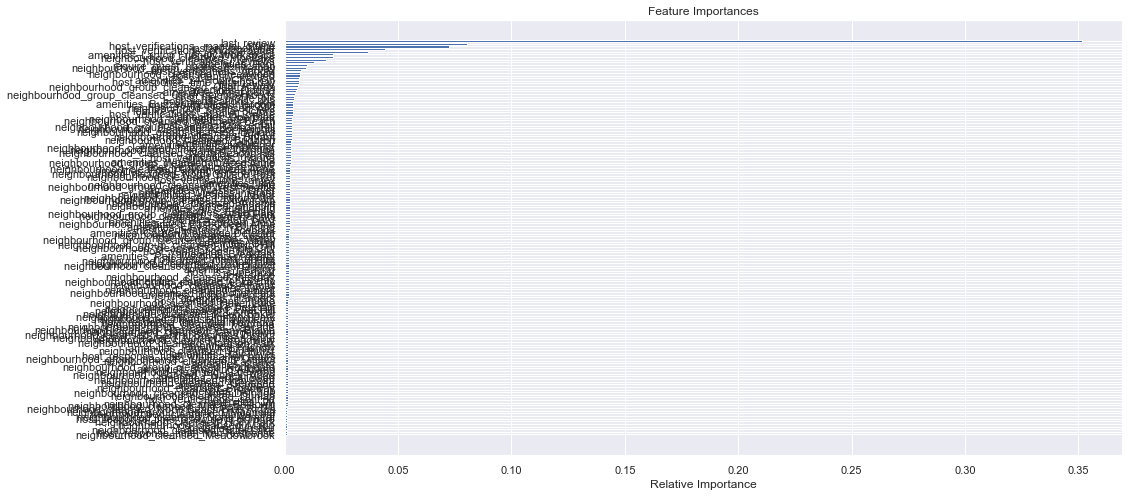

In [908]:
importances = rf_classifier_2.feature_importances_
indices = np.argsort(importances)
features = l_X.columns

plt.figure(figsize=(15,8))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [909]:
importances.max()

0.3515959369885781

In [910]:
importances.min()

0.0010054342982646122

In [911]:
np.median(importances)

0.0019630418936712043

In [912]:
pca.explained_variance_ratio_[0:10]

array([8.78435942e-01, 5.30432513e-02, 4.61197813e-02, 1.43245936e-02,
       5.11773382e-03, 1.27284592e-03, 5.62399191e-04, 3.92902387e-04,
       3.20848592e-04, 2.50157843e-04])

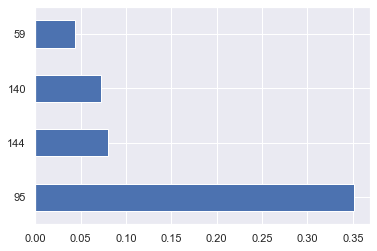

In [913]:
(pd.Series(importances, index=indices)
   .nlargest(4)
   .plot(kind='barh')) 

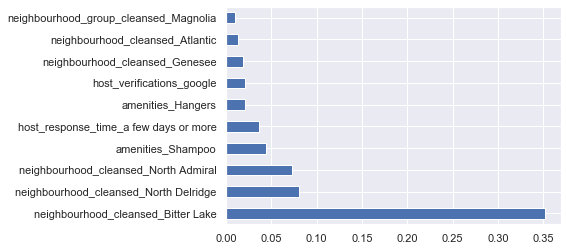

In [914]:
feat_importances = pd.Series(importances, index=features[indices])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [915]:
len(importances)

150

In [916]:
len(l_X.columns)

293

In [917]:
len(importances)

150

In [918]:
len(features)

293

In [ ]:
importances = rf_classifier_2.feature_importances_
indices = np.argsort(importances)
features = l_X.columns

In [919]:
indices

array([135,  68,  95,  64, 132, 121,  69, 140, 133,  82, 141, 136,  94,
        63,  21, 105, 144,  47,  99,  59, 113, 119,  55, 147, 112,  61,
        83,  33, 107,  88,  71,  44, 149,  39,  51, 130,  98, 145, 102,
       114, 118,  76, 131,  72, 109, 120, 139, 104, 110,  60, 117,  13,
        45,  48, 108, 111,  36,  93,  81,  62, 123,   0,   3,  46, 122,
       125, 146,  25,  56,  29,  15, 103,  75,  43,  86,  22, 127,  32,
        11,  37, 106,  53,  58, 129,  87,  38,  28,  96,  90,  79, 126,
       137,  67,  65,  89, 115,  50,  10, 148, 143,  42, 128,  26,  85,
        66,  18,  49, 142,  78, 124,  40,  31,  97, 100,  41,  73,  92,
        74,  23, 134, 101,  35,  17,   8,  91,  12,  30,  14,   4,  84,
        54,  34,  77,   1,  70,  27,   5, 116,  24,  80,   9,  57,  20,
       138,  52,   6,  19,   7,  16,   2])

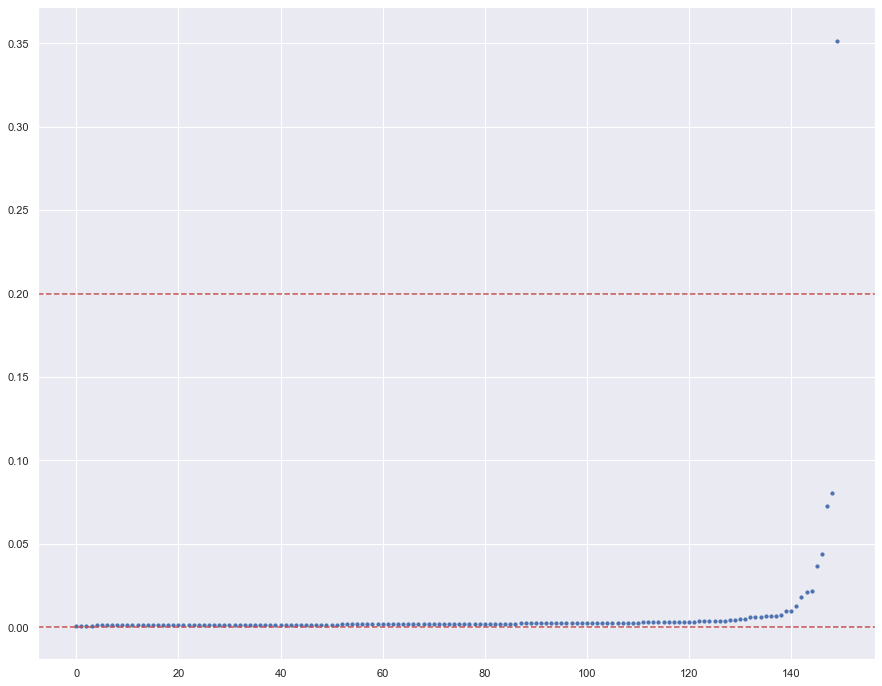

In [926]:
sorted_importances = sorted(rf_classifier_2.feature_importances_)
idx = []
for i in range(len(sorted_importances)):
    idx.append(i)
x = idx
y = sorted_importances

plt.figure(figsize=(15, 12))
plt.scatter(x, y , s=10)
plt.axhline(y=0.00, linestyle = '--', color = 'r')
plt.axhline(y=0.2, linestyle = '--', color = 'r')

In [931]:
importances[135]

0.0010054342982646122

In [933]:
importances[importances > 0.02]

array([0.35159594, 0.03670466, 0.072429  , 0.08050908, 0.04412242,
       0.02148576, 0.02115088])

In [936]:
rf_classifier_2.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<Figure size 1080x576 with 0 Axes>

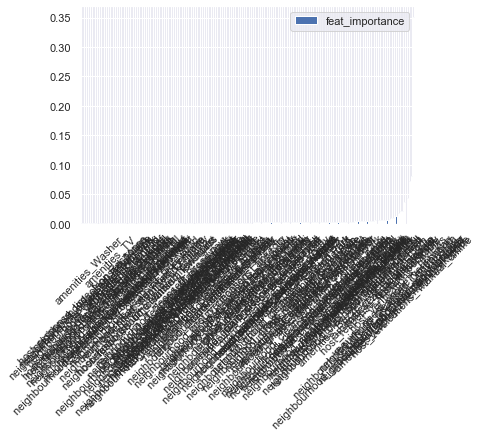

In [942]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(l_X.columns, rf_classifier_2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

plt.figure(figsize=(15, 8))
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feat_importance'})
importances.sort_values(by='feat_importance').plot(kind='bar', rot=45)
plt.show()

In [946]:
importances.feat_importance.nlargest(10)

last_review                            0.351596
host_verifications_ manual_offline     0.080509
instant_bookable                       0.072429
host_verifications_ photographer       0.044122
is_location_exact                      0.036705
amenities_Laptop Friendly Workspace    0.021486
neighbourhood_cleansed_Montlake        0.021151
host_verifications_ reviews            0.018293
amenities_Pool                         0.012799
require_guest_phone_verification       0.009696
Name: feat_importance, dtype: float64

In [56]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [149]:
DM_train = xgb.DMatrix(X_train, y_train)
DM_test =  xgb.DMatrix(X_test, y_test)

ValueError: feature_names must be unique